<a href="https://colab.research.google.com/github/soon15/2025-1-A-myclass-BDA/blob/main/Single_Living_in_Korea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns

In [33]:
!pip install koreanize_matplotlib

In [34]:
%config InlineBackend.figure_format = 'retina'

In [35]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [36]:
df = pd.read_csv("행정안전부_지역별(행정동) 성별 연령별 주민등록 1인세대수_20250430.csv", encoding="euc-kr")


csv 파일에 있는 모든 지역의 1인 가구 성별 비율

남자는 울산광역시가 제일 많고 여자는 부산광역시가 제일 많다

In [37]:
gender_by_region = df.groupby("시도명")[["계", "남자", "여자"]].sum()
gender_by_region["남자비율"] = gender_by_region["남자"] / gender_by_region["계"]
gender_by_region["여자비율"] = gender_by_region["여자"] / gender_by_region["계"]
print(gender_by_region[["남자비율", "여자비율"]].round(3))

          남자비율   여자비율
시도명                  
강원특별자치도  0.517  0.483
경기도      0.547  0.453
경상남도     0.517  0.483
경상북도     0.518  0.482
광주광역시    0.502  0.498
대구광역시    0.475  0.525
대전광역시    0.513  0.487
부산광역시    0.468  0.532
서울특별시    0.476  0.524
세종특별자치시  0.524  0.476
울산광역시    0.568  0.432
인천광역시    0.528  0.472
전라남도     0.511  0.489
전북특별자치도  0.501  0.499
제주특별자치도  0.519  0.481
충청남도     0.552  0.448
충청북도     0.538  0.462


csv 파일에서 서울특별시만 분류

In [38]:
seoul_df = df[df['시도명'] == '서울특별시']
seoul_df

,시도명,시군구명,읍면동명,계,남자,여자,0세남자,1세남자,2세남자,3세남자,...,101세여자,102세여자,103세여자,104세여자,105세여자,106세여자,107세여자,108세여자,109세여자,110세이상 여자
0,서울특별시,종로구,청운효자동,1918,707,1211,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,서울특별시,종로구,사직동,2337,897,1440,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,서울특별시,종로구,삼청동,538,254,284,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,서울특별시,종로구,부암동,1681,699,982,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,서울특별시,종로구,평창동,2275,866,1409,0,0,0,0,...,2,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,서울특별시,강동구,성내제2동,8107,3978,4129,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
422,서울특별시,강동구,성내제3동,4774,2235,2539,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
423,서울특별시,강동구,길동,11251,5281,5970,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
424,서울특별시,강동구,둔촌제1동,2012,887,1125,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


서울특별시 남녀 비율 계산

In [53]:
# 시도별로 남자/여자 합계 구하기
gender_by_district = df.groupby('시도명')[['남자', '여자']].sum()

# 전체 합계 계산
gender_by_district['전체'] = gender_by_district['남자'] + gender_by_district['여자']

# 남녀 비율 계산
gender_by_district['남자비율'] = gender_by_district['남자'] / gender_by_district['전체']
gender_by_district['여자비율'] = gender_by_district['여자'] / gender_by_district['전체']

# 출력 (소수점 3자리로)
print(gender_by_district.loc[['서울특별시'], ['남자비율', '여자비율']].round(3))


        남자비율   여자비율
시도명                
서울특별시  0.476  0.524


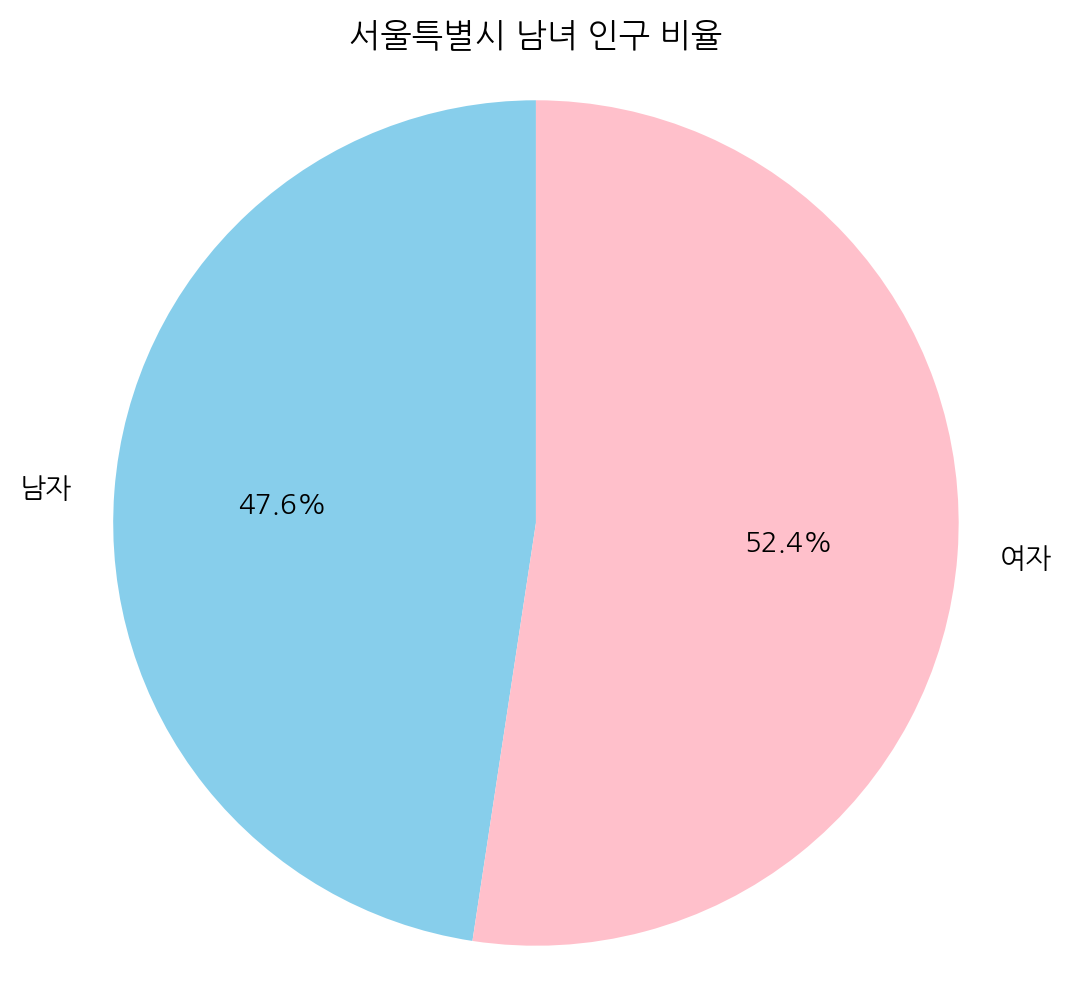

In [44]:
# 남녀 비율 계산
male_total = seoul_df.filter(like='남자').sum().sum()
female_total = seoul_df.filter(like='여자').sum().sum()

# 원 그래프 시각화
plt.figure(figsize=(6,6))
plt.pie([male_total, female_total],
        labels=['남자', '여자'],
        autopct='%.1f%%',
        startangle=90,
        colors=['skyblue', 'pink'])
plt.title('서울특별시 남녀 인구 비율')
plt.axis('equal')
plt.show()


서울특별시에서 1인 가구 수가 가장 많은 지역 출력

In [15]:
# 서울특별시 데이터만 필터링
seoul_df = df[df["시도명"] == "서울특별시"]

# '계' 값이 가장 큰 행의 인덱스 찾기
max_index = seoul_df["계"].idxmax()

# 해당 행의 정보 추출
top_seoul = seoul_df.loc[max_index, ["시군구명", "읍면동명", "계"]]

# 결과 출력
print("✅ 서울특별시에서 1인 가구 수가 가장 많은 지역:")
print(top_seoul)

✅ 서울특별시에서 1인 가구 수가 가장 많은 지역:
시군구명      관악구
읍면동명      청룡동
계       18369
Name: 324, dtype: object


전체 연령대의 1인 가구수 산점도 그래프 시각화

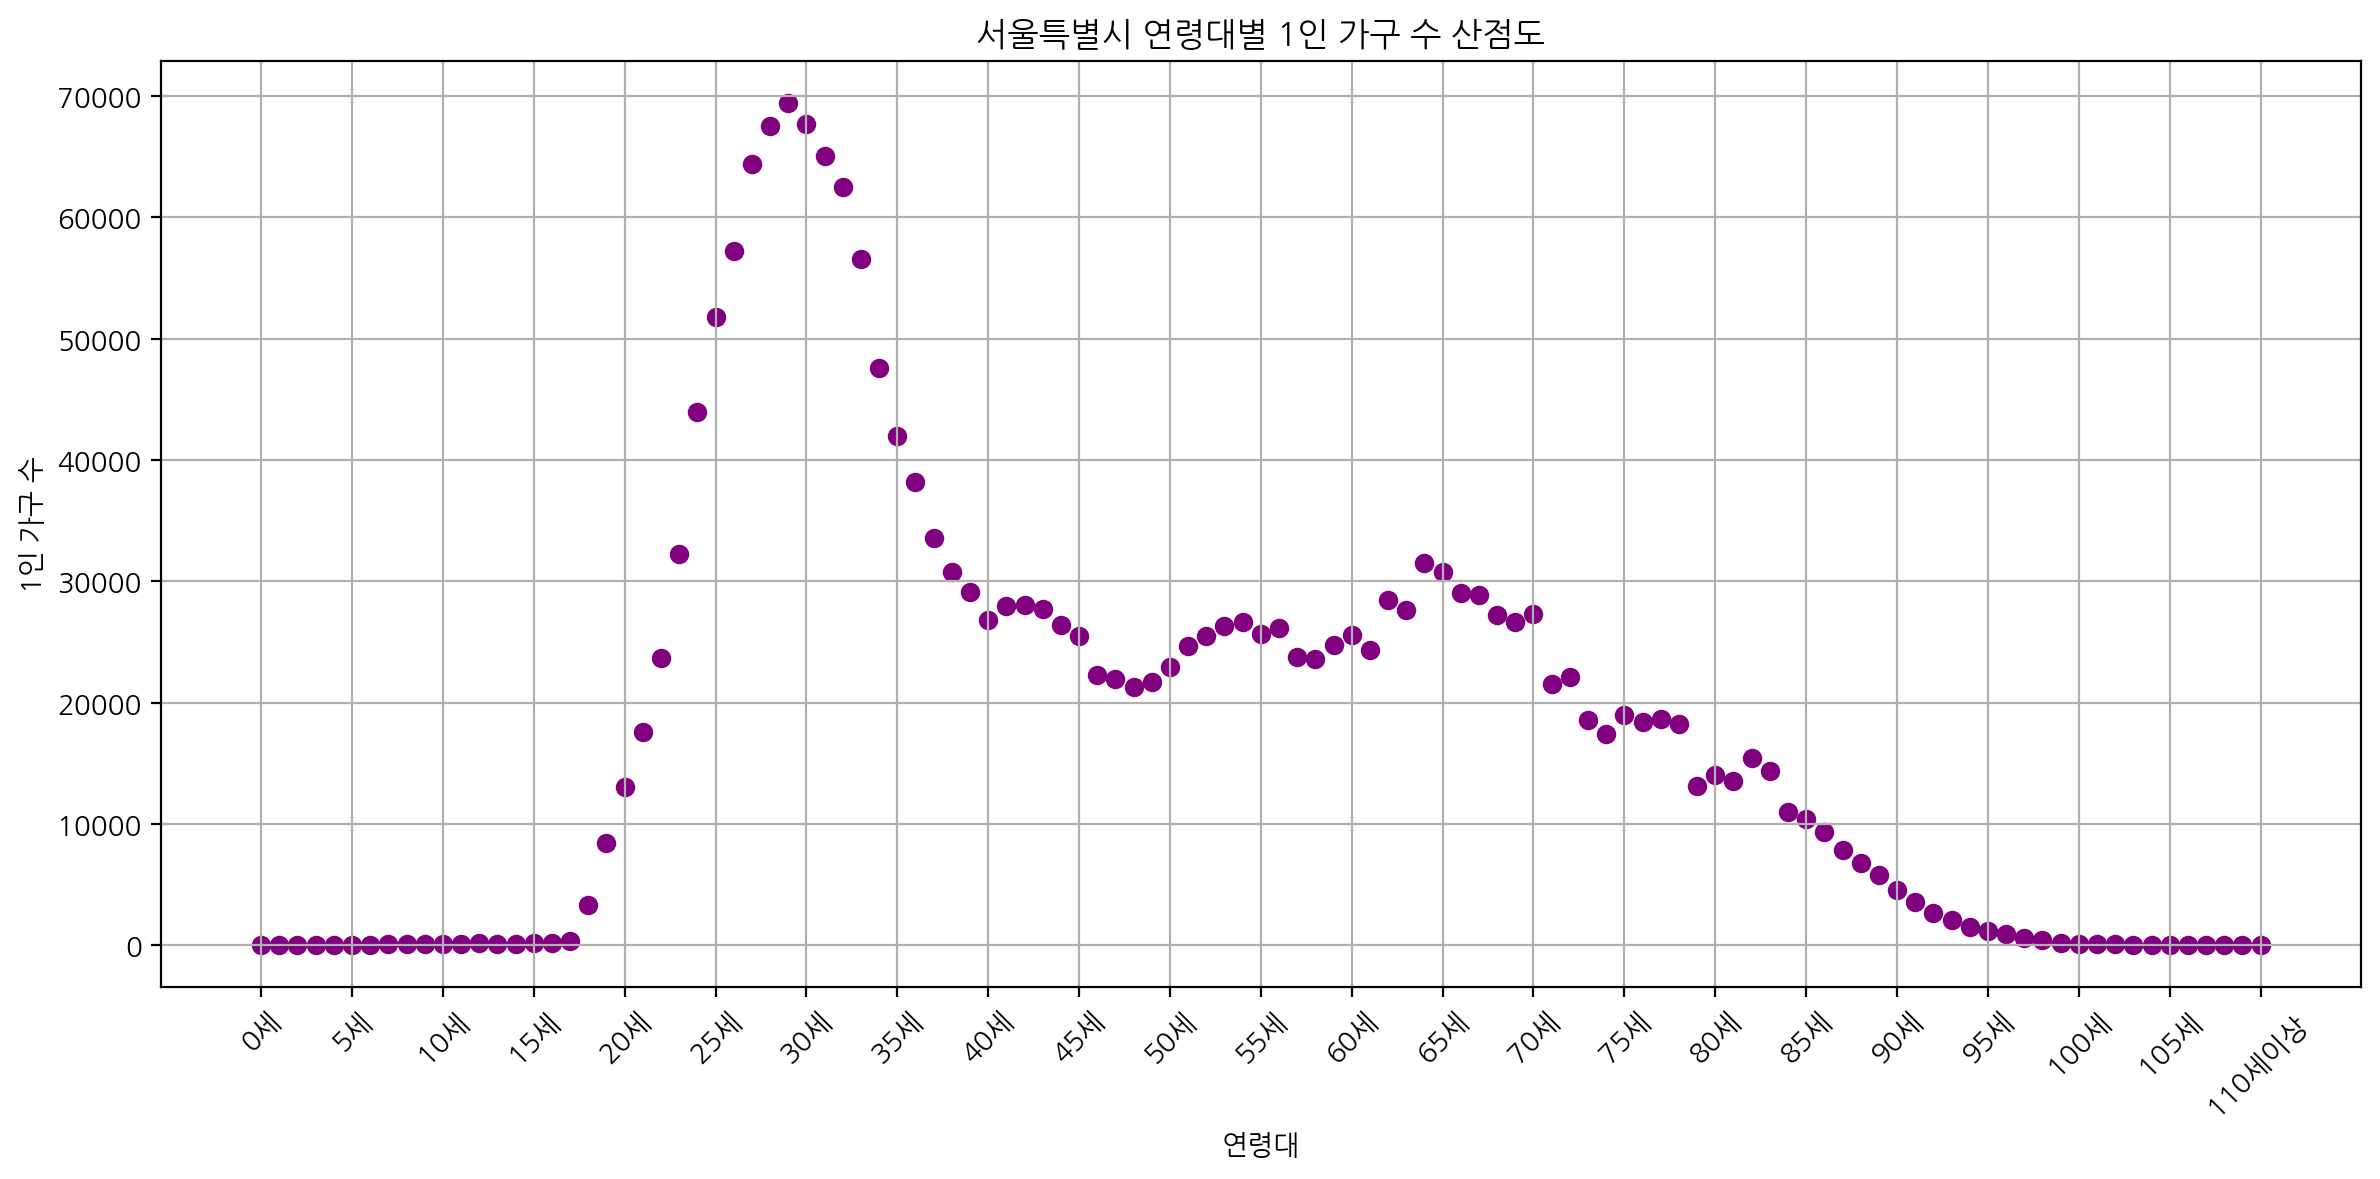

In [16]:
import matplotlib.pyplot as plt

# 서울특별시 데이터 필터링
seoul_df = df[df["시도명"] == "서울특별시"]

# 연령대별 남자/여자 컬럼 추출 및 중복 없는 연령대 추출
age_groups = sorted(
    {col[:-2] for col in df.columns if '세' in col and ('남자' in col or '여자' in col)},
    key=lambda age: int(age.replace('세이상', '').replace('세 이상', '').replace('세', ''))
)

# 연령대별 남+여 합계 계산
age_totals = [
    seoul_df.get(age + '남자', 0).sum() + seoul_df.get(age + '여자', 0).sum()
    for age in age_groups
]

# 산점도 그리기
plt.figure(figsize=(12, 6))
plt.scatter(age_groups, age_totals, color='purple')
plt.title('서울특별시 연령대별 1인 가구 수 산점도')
plt.xlabel('연령대')
plt.ylabel('1인 가구 수')
plt.xticks(ticks=range(0, len(age_groups), 5), labels=age_groups[::5], rotation=45, fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()


가장 많은 1인 가구 수와 그에 해당하는 연령대 구하기

In [18]:
max_index = age_totals.index(max(age_totals))
most_common_age = age_groups[max_index]
most_common_total = age_totals[max_index]

print(f"✅ 서울특별시에서 1인 가구 수가 가장 많은 연령대는 '{most_common_age}'이며, 총 {most_common_total}가구입니다.")

✅ 서울특별시에서 1인 가구 수가 가장 많은 연령대는 '29세'이며, 총 69399가구입니다.


csv 파일에서 인천광역시만 분류

In [19]:
incheon_df = df[df['시도명'] == '인천광역시']
incheon_df

,시도명,시군구명,읍면동명,계,남자,여자,0세남자,1세남자,2세남자,3세남자,...,101세여자,102세여자,103세여자,104세여자,105세여자,106세여자,107세여자,108세여자,109세여자,110세이상 여자
784,인천광역시,중구,연안동,1577,999,578,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
785,인천광역시,중구,신포동,1319,716,603,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
786,인천광역시,중구,신흥동,2963,1627,1336,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
787,인천광역시,중구,도원동,1069,559,510,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
788,인천광역시,중구,율목동,1101,611,490,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,인천광역시,옹진군,덕적면,789,460,329,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
940,인천광역시,옹진군,영흥면,2174,1390,784,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
941,인천광역시,옹진군,자월면,369,210,159,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
942,인천광역시,옹진군,자월면이작출장소,128,70,58,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


인천광역시 남녀 비율 계산

In [20]:
incheon_df['지역'] = incheon_df['시군구명'] + ' ' + incheon_df['읍면동명']

<ipython-input-20-7425aef44e8e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incheon_df['지역'] = incheon_df['시군구명'] + ' ' + incheon_df['읍면동명']


In [21]:
# 총 인구 컬럼 추가 (남자 + 여자)
incheon_df['계'] = incheon_df['남자'] + incheon_df['여자']

<ipython-input-21-b97141f5631a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incheon_df['계'] = incheon_df['남자'] + incheon_df['여자']


In [22]:
# 남자와 여자 인구 총합 계산
male_total = incheon_df['남자'].sum()
female_total = incheon_df['여자'].sum()

In [23]:
# 비율 계산
total = male_total + female_total
male_ratio = male_total / total
female_ratio = female_total / total

In [24]:
print("✅ 인천광역시 남녀 비율")
print(f"남자 비율: {male_ratio:.3f}")
print(f"여자 비율: {female_ratio:.3f}")

✅ 인천광역시 남녀 비율
남자 비율: 0.528
여자 비율: 0.472


인천광역시 남녀 비율 원그래프 시각화

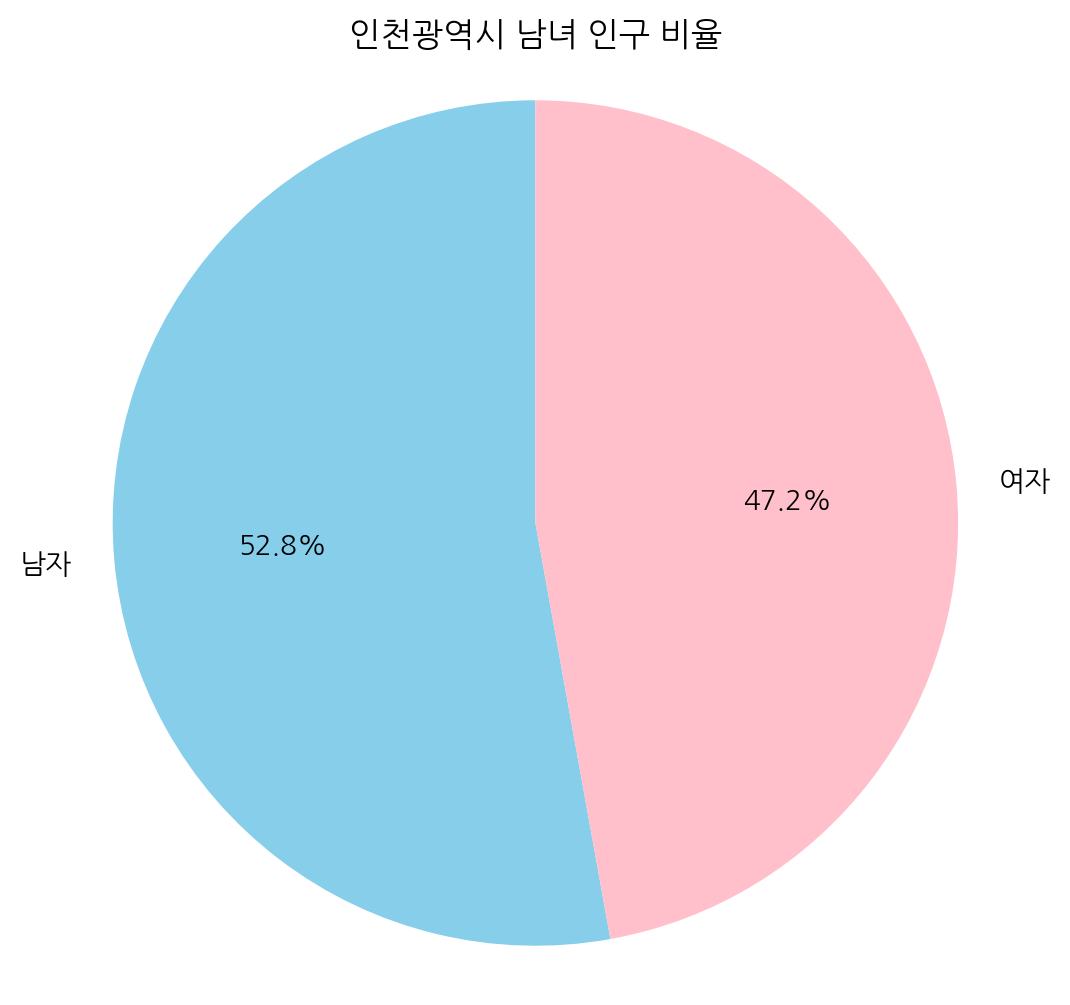

In [25]:
# 원 그래프 시각화
plt.figure(figsize=(6,6))
plt.pie([male_ratio, female_ratio],
        labels=['남자', '여자'],
        autopct='%.1f%%',
        startangle=90,
        colors=['skyblue', 'pink'])
plt.title('인천광역시 남녀 인구 비율')
plt.axis('equal')  # 원형 유지
plt.show()

인천광역시에서 1인 가구 수가 가장 많은 지역 출력

In [55]:
# 인천광역시 데이터만 필터링
busan_df = df[df["시도명"] == "인천광역시"]

# '계' 값이 가장 큰 행의 인덱스 찾기
max_index = incheon_df["계"].idxmax()

# 해당 행의 정보 추출
top_incheon = incheon_df.loc[max_index, ["시군구명", "읍면동명", "계"]]

# 결과 출력
print("✅ 인천광역시에서 1인 가구 수가 가장 많은 지역:")
print(top_incheon)

✅ 인천광역시에서 1인 가구 수가 가장 많은 지역:
시군구명       중구
읍면동명      운서동
계       14626
Name: 794, dtype: object


전체 연령대의 1인 가구수 산점도 그래프 시각화

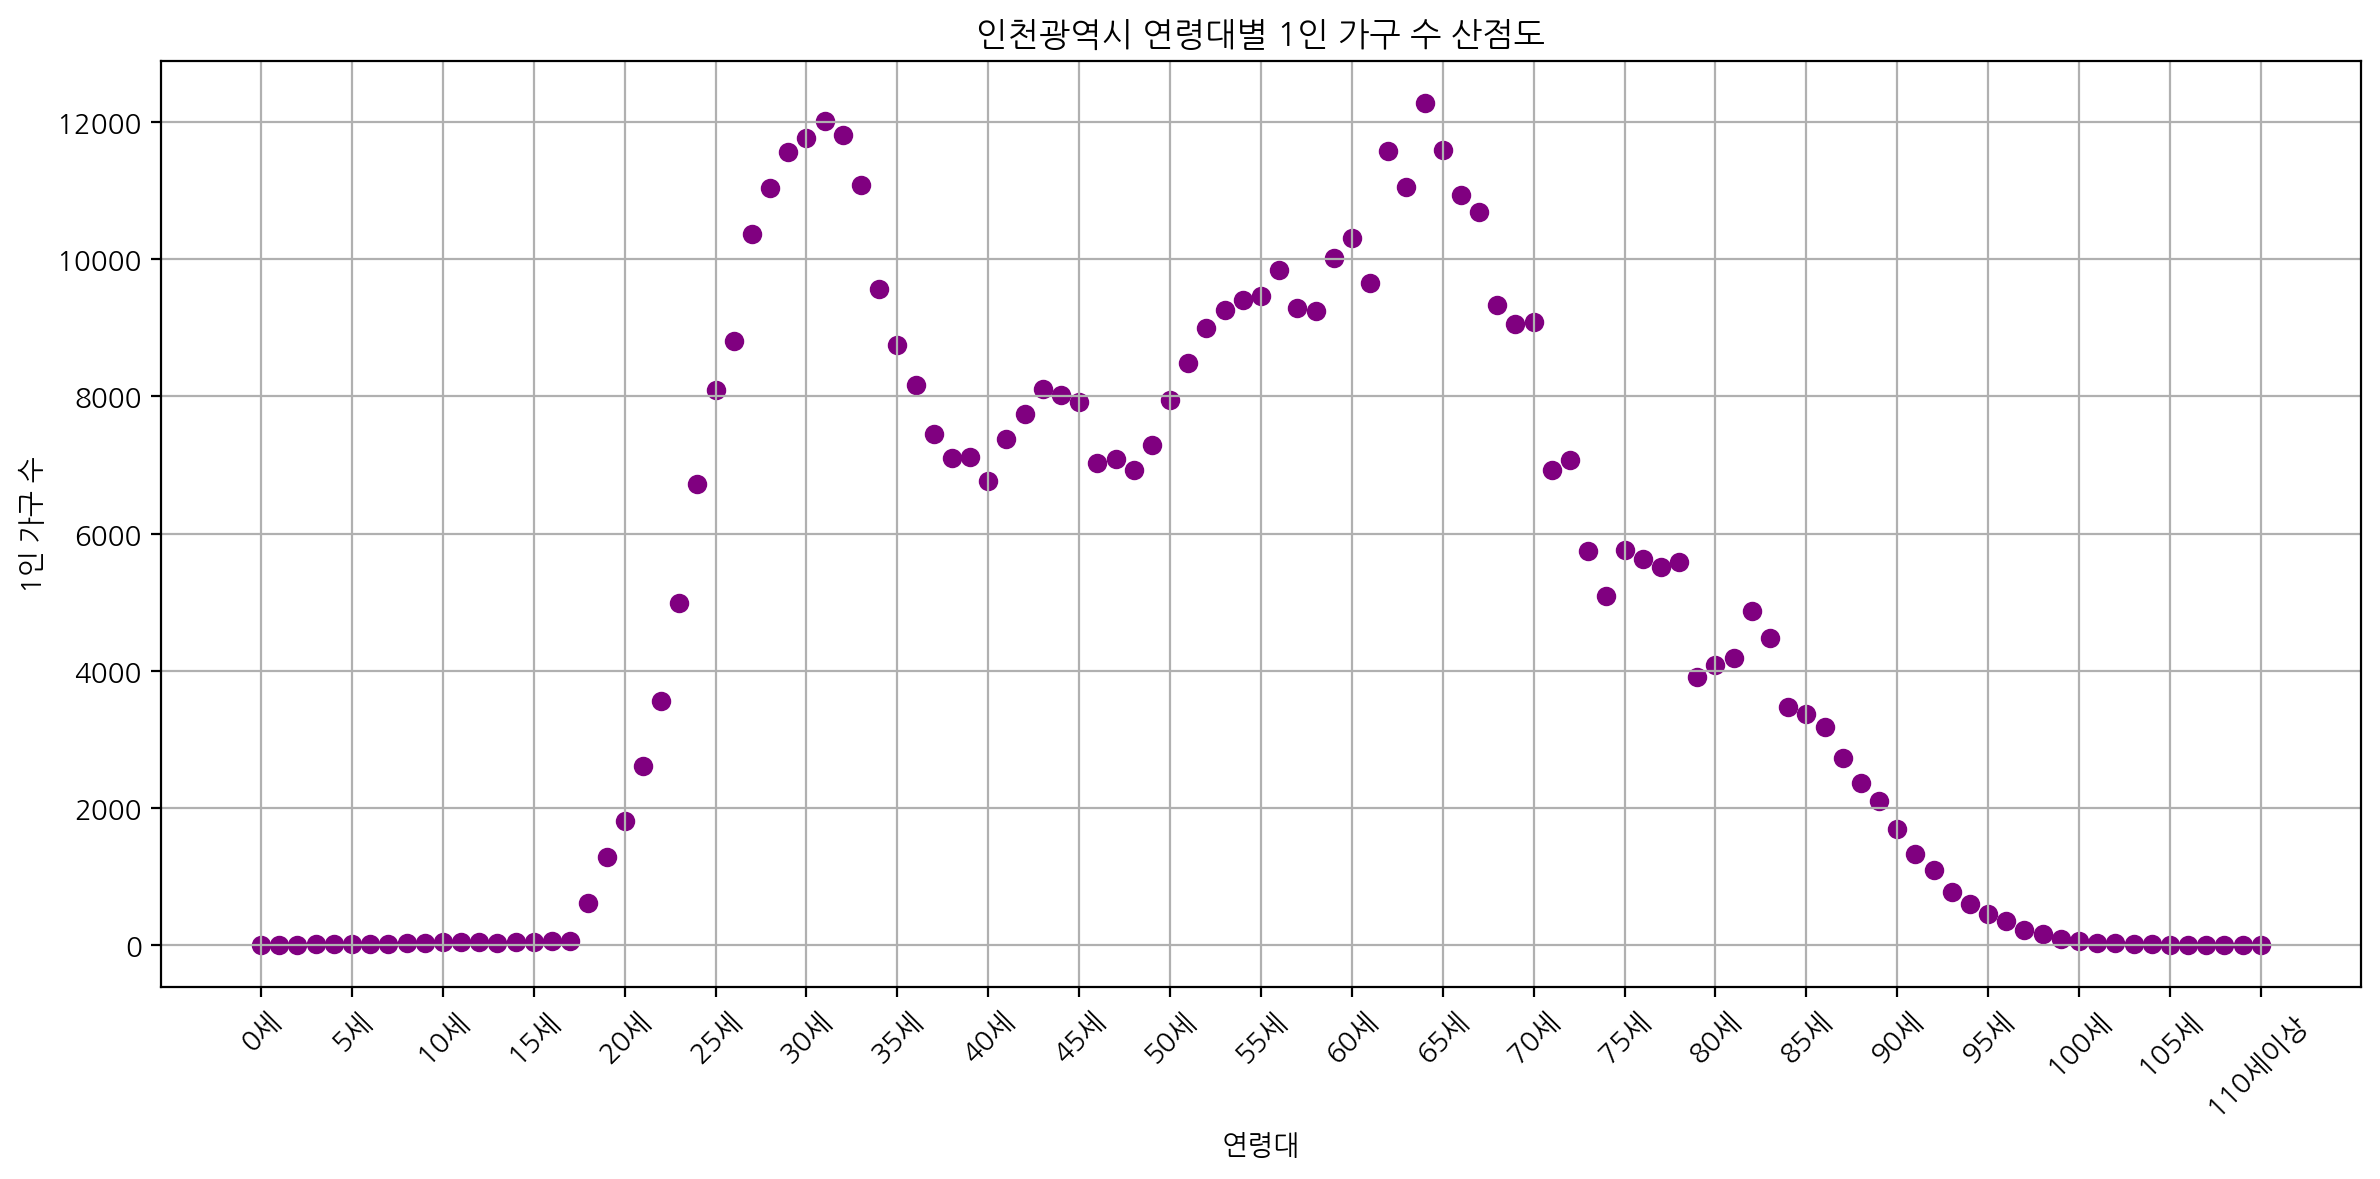

In [57]:
import matplotlib.pyplot as plt

# 인천광역시 데이터 필터링
incheon_df = df[df["시도명"] == "인천광역시"]

# 연령대 정렬용 함수
def age_to_int(age): return int(age.replace('세', '').replace('이상', '')) if '이상' in age else int(age.replace('세', ''))

# 연령대 목록 추출 및 정렬
age_groups = sorted({col[:-2] for col in df.columns if '세' in col and ('남자' in col or '여자' in col)}, key=age_to_int)

# 연령대별 남+여 합계
age_totals = [
    incheon_df.get(age + '남자', 0).sum() + incheon_df.get(age + '여자', 0).sum()
    for age in age_groups
]

# 산점도 시각화
plt.figure(figsize=(12, 6))
plt.scatter(age_groups, age_totals, color='purple')
plt.title('인천광역시 연령대별 1인 가구 수 산점도')
plt.xlabel('연령대')
plt.ylabel('1인 가구 수')
plt.xticks(range(0, len(age_groups), 5), age_groups[::5], rotation=45, fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()


가장 많은 1인 가구 수와 그에 해당하는 연령대 구하기

In [58]:
max_index = age_totals.index(max(age_totals))
most_common_age = age_groups_sorted[max_index]
most_common_total = age_totals[max_index]

print(f"✅ 인천광역시에서 1인 가구 수가 가장 많은 연령대는 '{most_common_age}'이며, 총 {most_common_total}가구입니다.")

✅ 인천광역시에서 1인 가구 수가 가장 많은 연령대는 '64세'이며, 총 12271가구입니다.


csv 파일에서 부산광역시만 분류

In [59]:
busan_df = df[df['시도명'] == '부산광역시']
busan_df

,시도명,시군구명,읍면동명,계,남자,여자,0세남자,1세남자,2세남자,3세남자,...,101세여자,102세여자,103세여자,104세여자,105세여자,106세여자,107세여자,108세여자,109세여자,110세이상 여자
426,부산광역시,중구,중앙동,2067,923,1144,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
427,부산광역시,중구,동광동,1025,556,469,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
428,부산광역시,중구,대청동,2079,945,1134,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
429,부산광역시,중구,보수동,3731,1686,2045,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
430,부산광역시,중구,부평동,1662,772,890,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,부산광역시,기장군,기장읍,11878,5531,6347,0,0,0,0,...,1,2,0,0,0,0,0,0,1,0
628,부산광역시,기장군,장안읍,2806,1673,1133,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
629,부산광역시,기장군,정관읍,9623,5089,4534,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
630,부산광역시,기장군,일광읍,4512,2259,2253,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


부산광역시 남녀 비율 계산

In [60]:
busan_df['지역'] = busan_df['시군구명'] + ' ' + busan_df['읍면동명']

<ipython-input-60-f3743f44e60a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  busan_df['지역'] = busan_df['시군구명'] + ' ' + busan_df['읍면동명']


In [61]:
# 총 인구 컬럼 추가 (남자 + 여자)
busan_df['계'] = busan_df['남자'] + busan_df['여자']

<ipython-input-61-6c6f55be2ae2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  busan_df['계'] = busan_df['남자'] + busan_df['여자']


In [62]:
# 남자와 여자 인구 총합 계산
male_total = busan_df['남자'].sum()
female_total = busan_df['여자'].sum()

In [63]:
# 비율 계산
total = male_total + female_total
male_ratio = male_total / total
female_ratio = female_total / total

In [64]:
print("✅ 부산광역시 남녀 비율")
print(f"남자 비율: {male_ratio:.3f}")
print(f"여자 비율: {female_ratio:.3f}")

✅ 부산광역시 남녀 비율
남자 비율: 0.468
여자 비율: 0.532


부산광역시 남녀 비율 원그래프 시각화

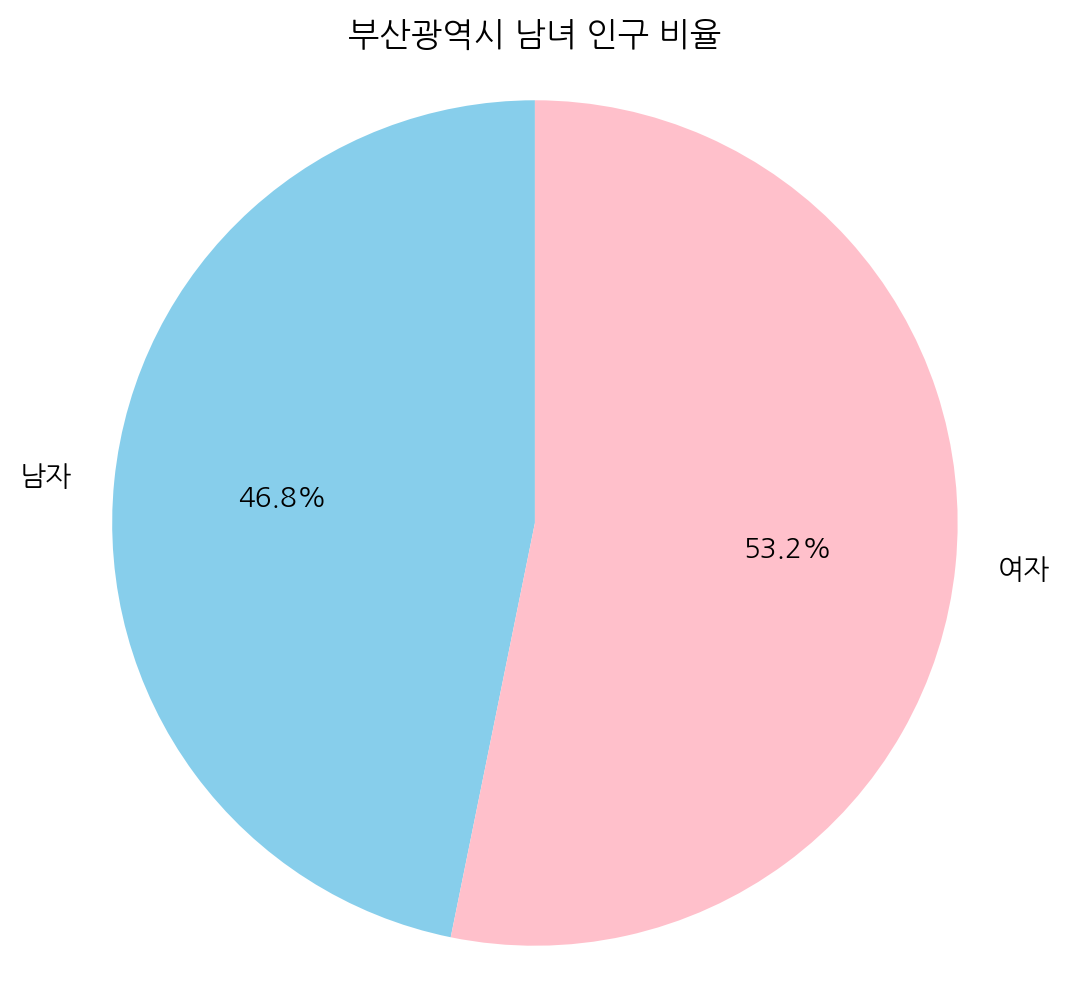

In [65]:
# 원 그래프 시각화
plt.figure(figsize=(6,6))
plt.pie([male_ratio, female_ratio],
        labels=['남자', '여자'],
        autopct='%.1f%%',
        startangle=90,
        colors=['skyblue', 'pink'])
plt.title('부산광역시 남녀 인구 비율')
plt.axis('equal')  # 원형 유지
plt.show()

부산광역시에서 1인 가구 수가 가장 많은 지역 출력

In [66]:
# 부산광역시 데이터만 필터링
busan_df = df[df["시도명"] == "부산광역시"]

# '계' 값이 가장 큰 행의 인덱스 찾기
max_index = busan_df["계"].idxmax()

# 해당 행의 정보 추출
top_busan = busan_df.loc[max_index, ["시군구명", "읍면동명", "계"]]

# 결과 출력
print("✅ 부산광역시에서 1인 가구 수가 가장 많은 지역:")
print(top_busan)

✅ 부산광역시에서 1인 가구 수가 가장 많은 지역:
시군구명      기장군
읍면동명      기장읍
계       11878
Name: 627, dtype: object


전체 연령대의 1인 가구수 산점도 그래프 시각화

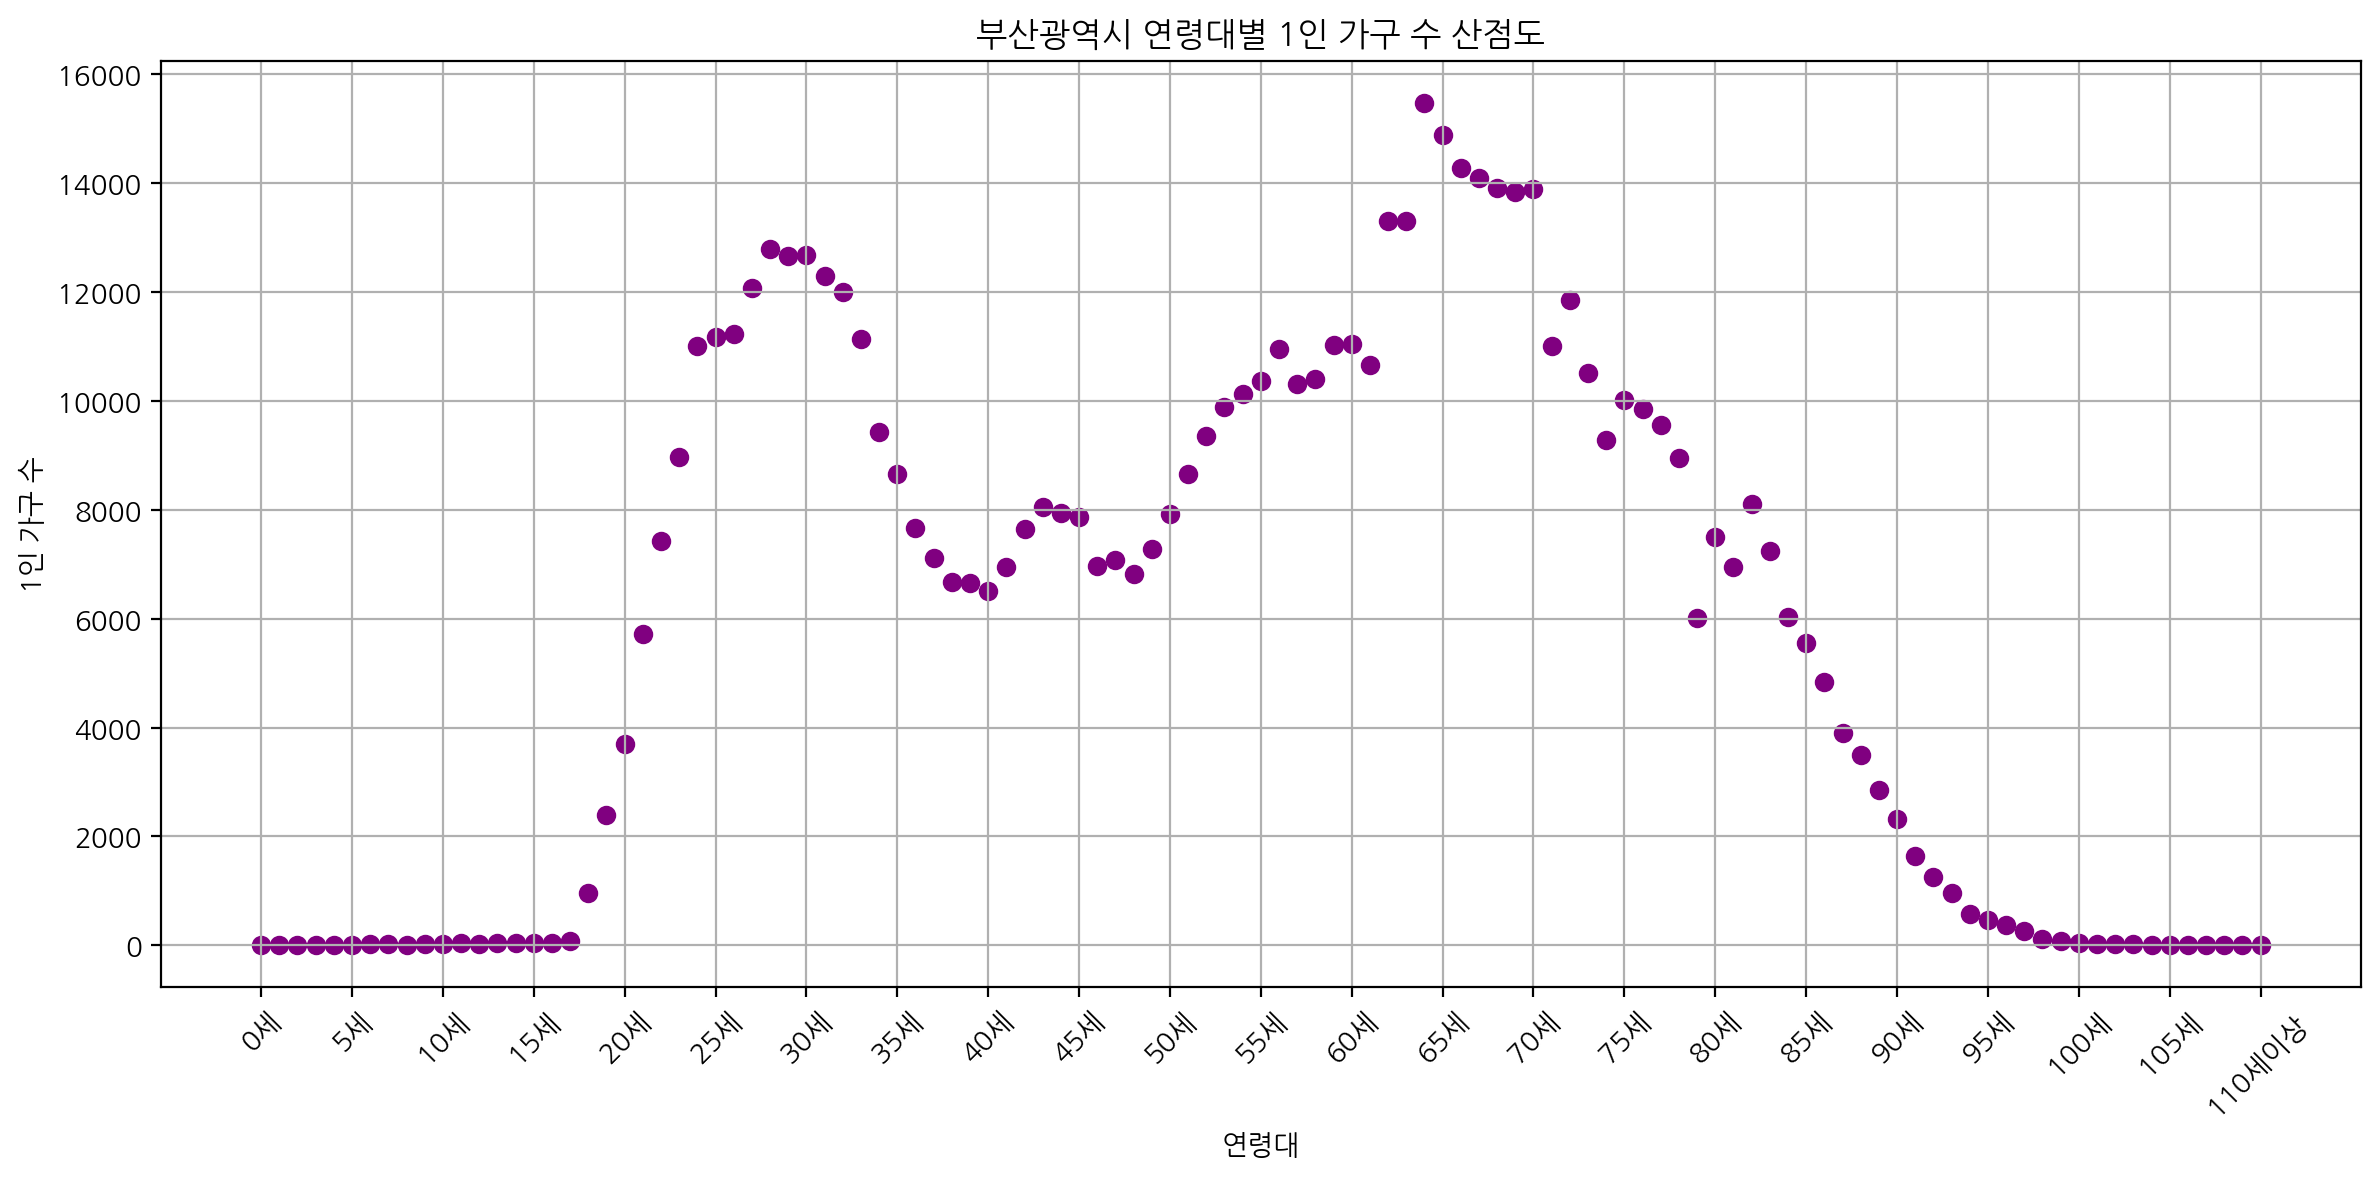

In [68]:
import matplotlib.pyplot as plt

# 부산광역시 데이터 필터링
busan_df = df[df["시도명"] == "부산광역시"]

# 연령대 정렬용 함수
def age_to_int(age): return int(age.replace('세', '').replace('이상', '')) if '이상' in age else int(age.replace('세', ''))

# 연령대 목록 추출 및 정렬
age_groups = sorted({col[:-2] for col in df.columns if '세' in col and ('남자' in col or '여자' in col)}, key=age_to_int)

# 연령대별 남+여 합계 계산
age_totals = [
    busan_df.get(age + '남자', 0).sum() + busan_df.get(age + '여자', 0).sum()
    for age in age_groups
]

# 산점도 시각화
plt.figure(figsize=(12, 6))
plt.scatter(age_groups, age_totals, color='purple')
plt.title('부산광역시 연령대별 1인 가구 수 산점도')
plt.xlabel('연령대')
plt.ylabel('1인 가구 수')
plt.xticks(range(0, len(age_groups), 5), age_groups[::5], rotation=45, fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

가장 많은 1인 가구 수와 그에 해당하는 연령대 구하기

In [69]:
max_index = age_totals.index(max(age_totals))
most_common_age = age_groups_sorted[max_index]
most_common_total = age_totals[max_index]

print(f"✅ 부산광역시에서 1인 가구 수가 가장 많은 연령대는 '{most_common_age}'이며, 총 {most_common_total}가구입니다.")

✅ 부산광역시에서 1인 가구 수가 가장 많은 연령대는 '64세'이며, 총 15469가구입니다.


csv 파일에서 대구광역시만 분류

In [70]:
daegu_df = df[df['시도명'] == '대구광역시']
daegu_df

,시도명,시군구명,읍면동명,계,남자,여자,0세남자,1세남자,2세남자,3세남자,...,101세여자,102세여자,103세여자,104세여자,105세여자,106세여자,107세여자,108세여자,109세여자,110세이상 여자
632,대구광역시,중구,동인동,3512,1795,1717,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
633,대구광역시,중구,삼덕동,2892,1451,1441,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
634,대구광역시,중구,성내1동,2928,1351,1577,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
635,대구광역시,중구,성내2동,2772,1325,1447,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
636,대구광역시,중구,성내3동,1913,1018,895,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,대구광역시,군위군,부계면,722,392,330,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
780,대구광역시,군위군,우보면,738,373,365,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
781,대구광역시,군위군,의흥면,788,377,411,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
782,대구광역시,군위군,산성면,475,235,240,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


대구광역시 남녀 비율 계산

In [71]:
daegu_df['지역'] = daegu_df['시군구명'] + ' ' + daegu_df['읍면동명']

<ipython-input-71-6efc4dc40586>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daegu_df['지역'] = daegu_df['시군구명'] + ' ' + daegu_df['읍면동명']


In [72]:
# 총 인구 컬럼 추가 (남자 + 여자)
daegu_df['계'] = daegu_df['남자'] + daegu_df['여자']

<ipython-input-72-0b8c1598cec1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daegu_df['계'] = daegu_df['남자'] + daegu_df['여자']


In [73]:
# 남자와 여자 인구 총합 계산
male_total = daegu_df['남자'].sum()
female_total = daegu_df['여자'].sum()

In [74]:
# 비율 계산
total = male_total + female_total
male_ratio = male_total / total
female_ratio = female_total / total

In [75]:
print("✅ 대구광역시 남녀 비율")
print(f"남자 비율: {male_ratio:.3f}")
print(f"여자 비율: {female_ratio:.3f}")

✅ 대구광역시 남녀 비율
남자 비율: 0.475
여자 비율: 0.525


대구광역시 남녀 비율 원그래프 시각화

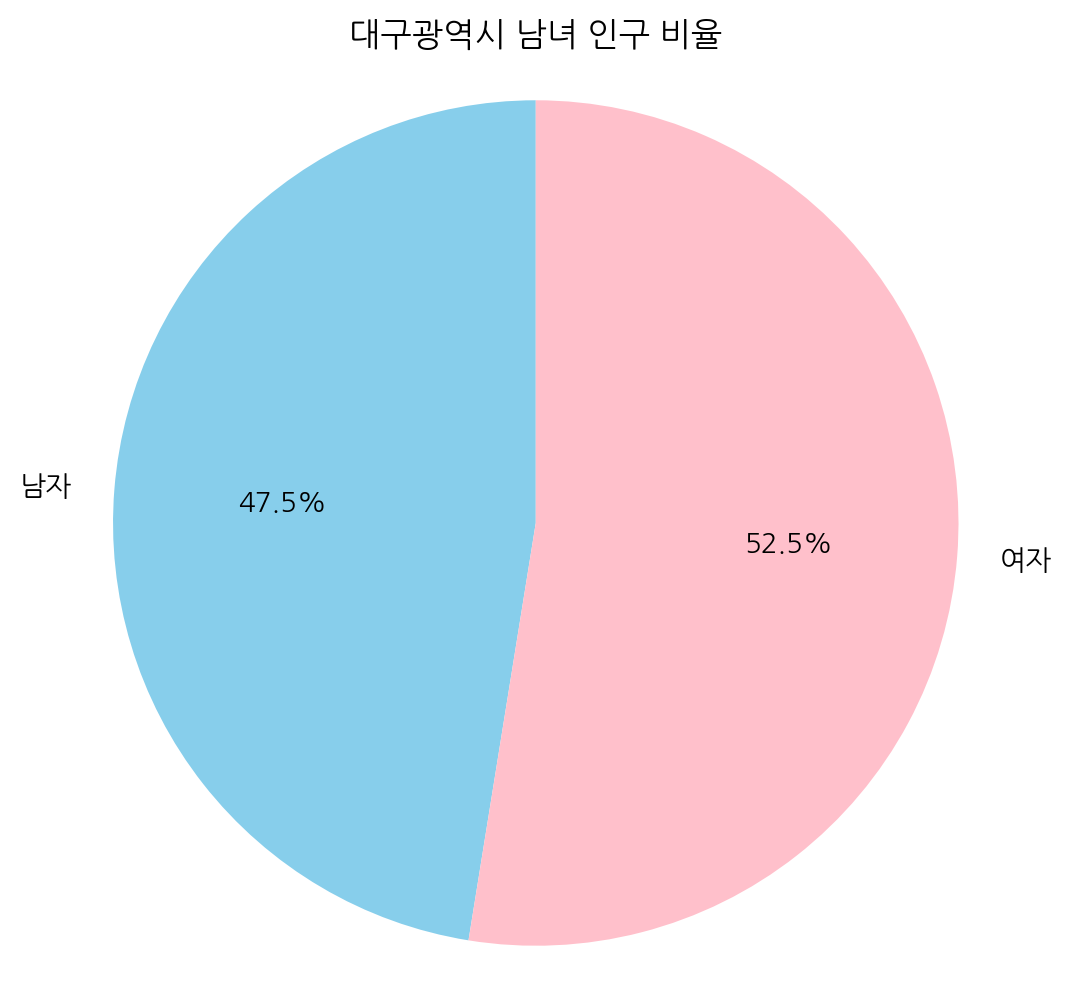

In [76]:
# 원 그래프 시각화
plt.figure(figsize=(6,6))
plt.pie([male_ratio, female_ratio],
        labels=['남자', '여자'],
        autopct='%.1f%%',
        startangle=90,
        colors=['skyblue', 'pink'])
plt.title('대구광역시 남녀 인구 비율')
plt.axis('equal')  # 원형 유지
plt.show()

대구광역시에서 1인 가구 수가 가장 많은 지역 출력

In [77]:
# 대구광역시 데이터만 필터링
daegu_df = df[df["시도명"] == "대구광역시"]

# '계' 값이 가장 큰 행의 인덱스 찾기
max_index = daegu_df["계"].idxmax()

# 해당 행의 정보 추출
top_daegu = daegu_df.loc[max_index, ["시군구명", "읍면동명", "계"]]

# 결과 출력
print("✅ 대구광역시에서 1인 가구 수가 가장 많은 지역:")
print(top_daegu)

✅ 대구광역시에서 1인 가구 수가 가장 많은 지역:
시군구명      달서구
읍면동명      신당동
계       10853
Name: 752, dtype: object


전체 연령대의 1인 가구수 산점도 그래프 시각화

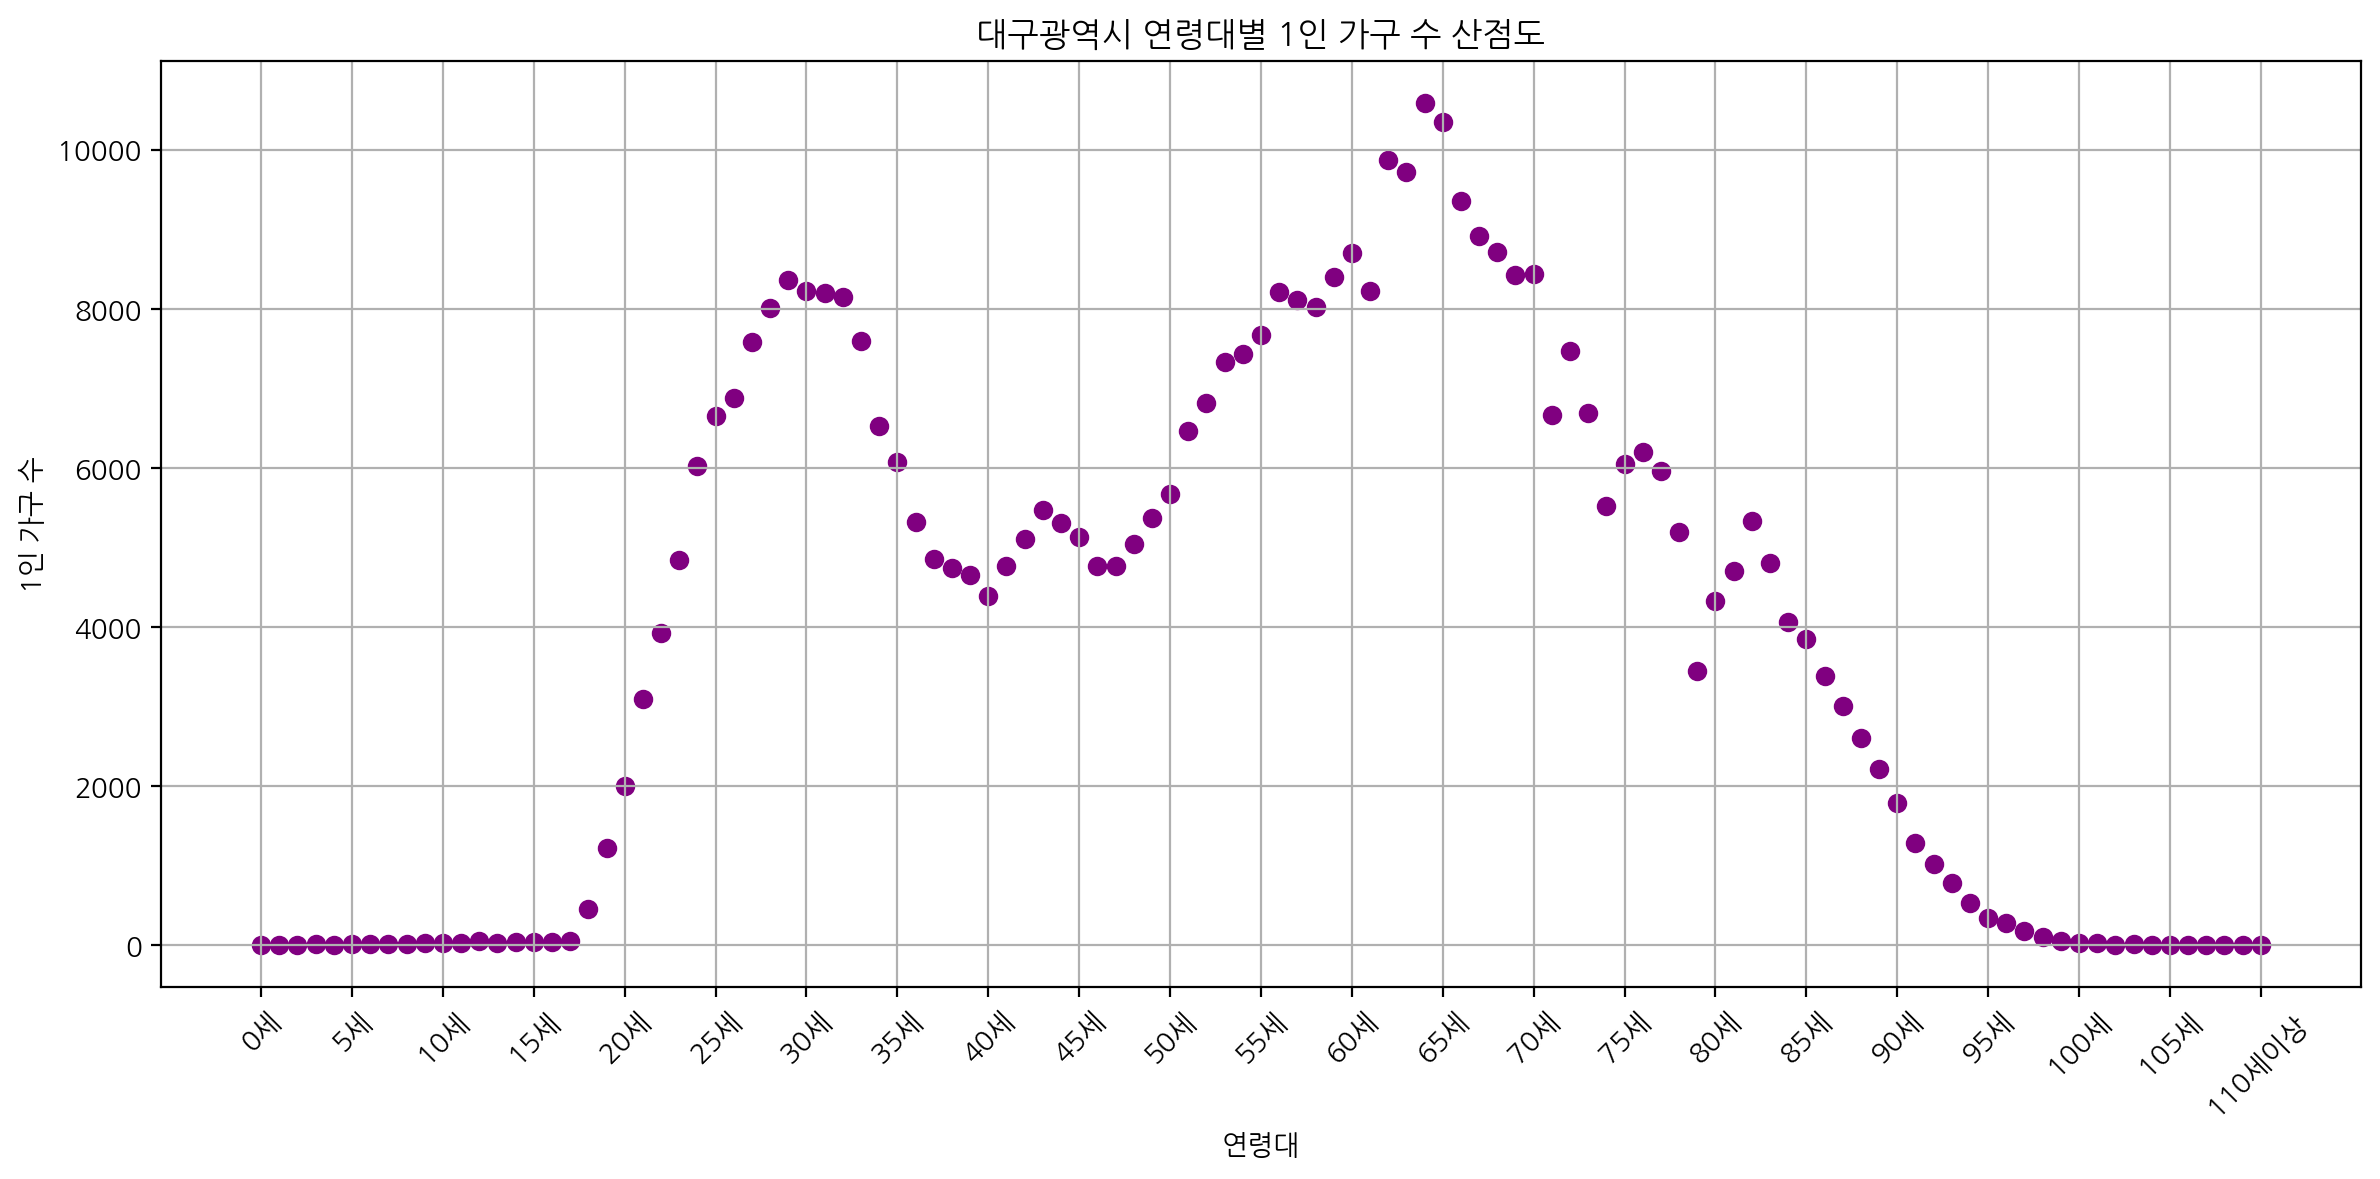

In [78]:
import matplotlib.pyplot as plt

# 대구광역시 데이터 필터링
daegu_df = df[df["시도명"] == "대구광역시"]

# 연령대 추출 및 정렬 함수
def age_to_int(age): return int(age.replace('세', '').replace('이상', '')) if '이상' in age else int(age.replace('세', ''))

# 연령대 목록 정리
age_groups = sorted({col[:-2] for col in df.columns if '세' in col and ('남자' in col or '여자' in col)}, key=age_to_int)

# 연령대별 남+여 합계 계산
age_totals = [
    daegu_df.get(age + '남자', 0).sum() + daegu_df.get(age + '여자', 0).sum()
    for age in age_groups
]

# 산점도 시각화
plt.figure(figsize=(12, 6))
plt.scatter(age_groups, age_totals, color='purple')
plt.title('대구광역시 연령대별 1인 가구 수 산점도')
plt.xlabel('연령대')
plt.ylabel('1인 가구 수')
plt.xticks(range(0, len(age_groups), 5), age_groups[::5], rotation=45, fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

In [79]:
max_index = age_totals.index(max(age_totals))
most_common_age = age_groups_sorted[max_index]
most_common_total = age_totals[max_index]

print(f"✅ 대구광역시에서 1인 가구 수가 가장 많은 연령대는 '{most_common_age}'이며, 총 {most_common_total}가구입니다.")

✅ 대구광역시에서 1인 가구 수가 가장 많은 연령대는 '64세'이며, 총 10581가구입니다.


csv 파일에서 경기도만 분류

In [80]:
gyeonggi_df = df[df['시도명'] == '경기도'].copy()

gyeonggi_df

,시도명,시군구명,읍면동명,계,남자,여자,0세남자,1세남자,2세남자,3세남자,...,101세여자,102세여자,103세여자,104세여자,105세여자,106세여자,107세여자,108세여자,109세여자,110세이상 여자
1201,경기도,수원시 장안구,파장동,4713,2527,2186,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1202,경기도,수원시 장안구,율천동,9665,6137,3528,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1203,경기도,수원시 장안구,정자1동,3503,1591,1912,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1204,경기도,수원시 장안구,정자2동,5318,2554,2764,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1205,경기도,수원시 장안구,정자3동,3094,1644,1450,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1799,경기도,양평군,청운면,1173,613,560,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1800,경기도,양평군,양동면,1248,646,602,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1801,경기도,양평군,지평면,1770,925,845,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1802,경기도,양평군,용문면,4138,2123,2015,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


경기도 1인가구 남자 여자 총합 비율

In [85]:
from tabulate import tabulate

# 결측값 처리
gyeonggi_df['남자'] = pd.to_numeric(gyeonggi_df['남자'], errors='coerce').fillna(0)
gyeonggi_df['여자'] = pd.to_numeric(gyeonggi_df['여자'], errors='coerce').fillna(0)

# 시군구별로 남자/여자 1인 세대 합산
gyeonggi_by_city = gyeonggi_df.groupby('시군구명')[['남자', '여자']].sum()

# 총합 및 비율 계산
gyeonggi_by_city['총합'] = gyeonggi_by_city['남자'] + gyeonggi_by_city['여자']
gyeonggi_by_city['남자비율'] = (gyeonggi_by_city['남자'] / gyeonggi_by_city['총합']) * 100
gyeonggi_by_city['여자비율'] = (gyeonggi_by_city['여자'] / gyeonggi_by_city['총합']) * 100

# 반올림
gyeonggi_by_city = gyeonggi_by_city.round({'남자비율': 2, '여자비율': 2})

# 인덱스를 컬럼으로
gyeonggi_by_city = gyeonggi_by_city.reset_index()

# 결과 출력
print(tabulate(gyeonggi_by_city, headers='keys', tablefmt='plain', showindex=False))

시군구명           남자    여자    총합    남자비율    여자비율
가평군             8955    7670   16625       53.86       46.14
고양시 덕양구     41616   41473   83089       50.09       49.91
고양시 일산동구   24017   25172   49189       48.83       51.17
고양시 일산서구   15873   18293   34166       46.46       53.54
과천시             2983    3371    6354       46.95       53.05
광명시            17369   19006   36375       47.75       52.25
광주시            36192   26332   62524       57.88       42.12
구리시            15092   14094   29186       51.71       48.29
군포시            20830   19918   40748       51.12       48.88
김포시            38446   32907   71353       53.88       46.12
남양주시          51348   49445  100793       50.94       49.06
동두천시          10206    9639   19845       51.43       48.57
부천시 소사구     16178   17412   33590       48.16       51.84
부천시 오정구     14184   12326   26510       53.5        46.5
부천시 원미구     33497   33208   66705       50.22       49.78
성남시 분당구     29365   32659   62024       47.34       52.66
성남시 

경기도 1인가구 상위 5개지역

In [86]:
import pandas as pd
from tabulate import tabulate

# CSV 파일 로드
df = pd.read_csv("/content/행정안전부_지역별(행정동) 성별 연령별 주민등록 1인세대수_20250430.csv", encoding='euc-kr')

# 경기도 데이터 필터링
gyeonggi_df = df[df['시도명'] == '경기도'].copy()

# 결측값 처리
gyeonggi_df['남자'] = pd.to_numeric(gyeonggi_df['남자'], errors='coerce').fillna(0)
gyeonggi_df['여자'] = pd.to_numeric(gyeonggi_df['여자'], errors='coerce').fillna(0)

# 총합 계산
gyeonggi_df['총합'] = gyeonggi_df['남자'] + gyeonggi_df['여자']

# 총합 기준 내림차순 정렬 후 상위 5개
top_area = gyeonggi_df.sort_values(by='총합', ascending=False).head(5)

# 결과 출력
print(tabulate(top_area[['시군구명', '읍면동명', '남자', '여자', '총합']], headers='keys', tablefmt='plain', showindex=False))

시군구명    읍면동명      남자    여자    총합
화성시      향남읍       12512    6367   18879
하남시      미사1동       7582    7748   15330
화성시      봉담읍        8851    6429   15280
의정부시    의정부1동     7722    6572   14294
화성시      남양읍        9405    4854   14259


경기도 1인가구 하위 5개지역

In [87]:
import pandas as pd
from tabulate import tabulate

# CSV 파일 로드
df = pd.read_csv("/content/행정안전부_지역별(행정동) 성별 연령별 주민등록 1인세대수_20250430.csv", encoding='euc-kr')

# 경기도 데이터 필터링
gyeonggi_df = df[df['시도명'] == '경기도'].copy()

# 숫자형으로 변환 후 결측값 처리
gyeonggi_df['남자'] = pd.to_numeric(gyeonggi_df['남자'], errors='coerce').fillna(0)
gyeonggi_df['여자'] = pd.to_numeric(gyeonggi_df['여자'], errors='coerce').fillna(0)

# 총합 계산
gyeonggi_df['총합'] = gyeonggi_df['남자'] + gyeonggi_df['여자']

# 총합 기준 오름차순 정렬 후 상위 5개 추출
top_area = gyeonggi_df.sort_values(by='총합').head(5)

# 결과 출력
print(tabulate(top_area[['시군구명', '읍면동명', '남자', '여자', '총합']], headers='keys', tablefmt='plain', showindex=False))

시군구명       읍면동명      남자    여자    총합
연천군         중면            37      18      55
파주시         장단면          84      46     130
연천군         장남면          92      89     181
성남시 분당구  수내2동        105     169     274
연천군         왕징면         184     132     316


경기도 1인 가구 산점도 그래프 시각화

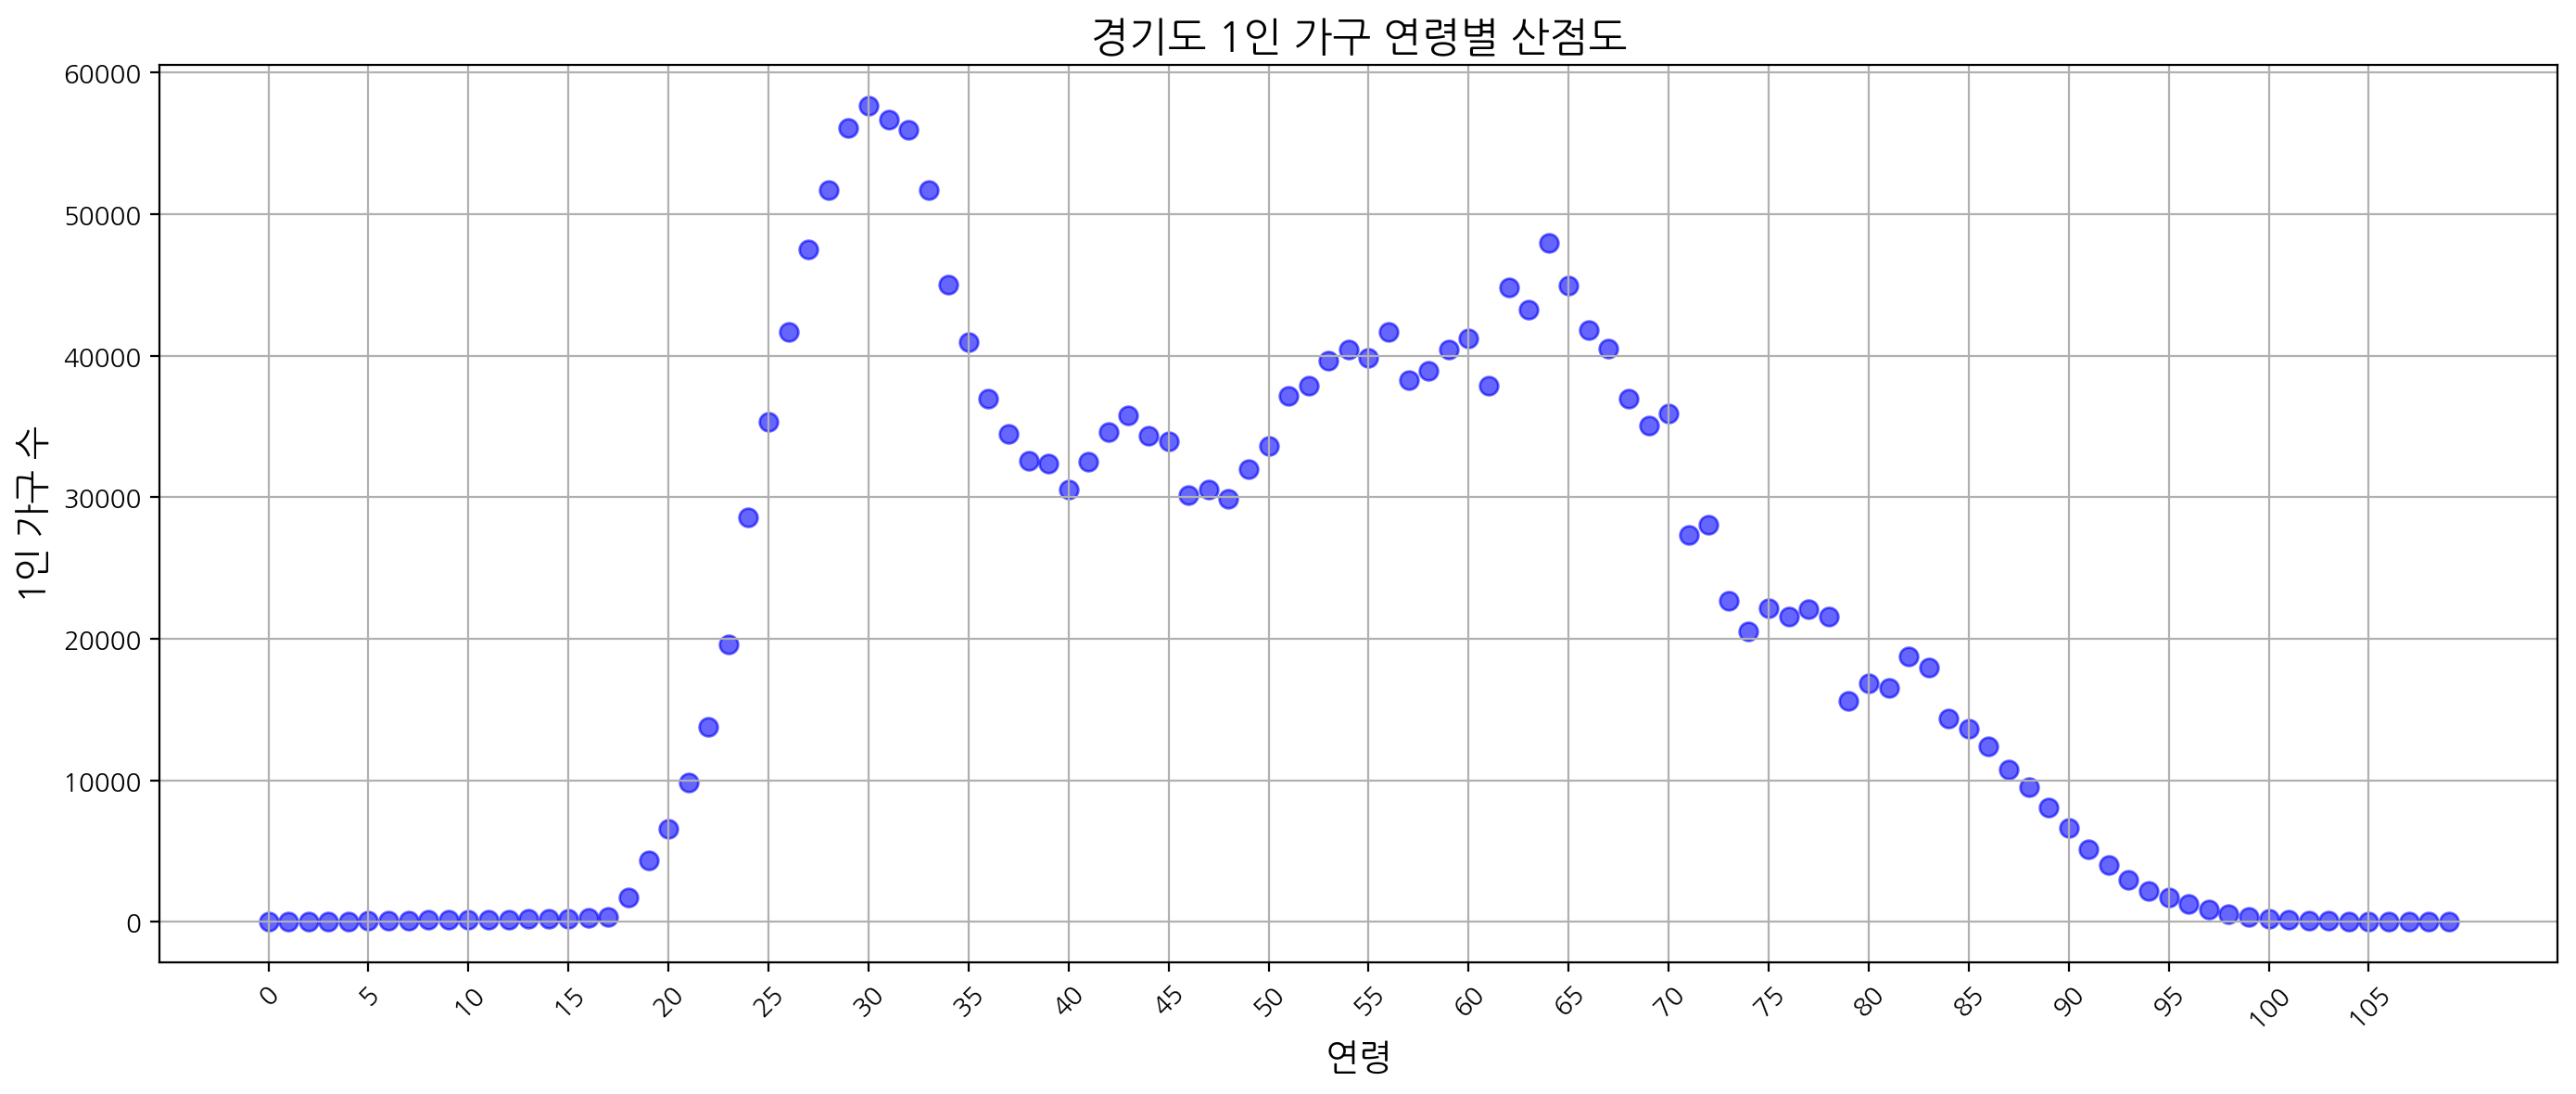

In [93]:
import matplotlib.pyplot as plt

age_totals = {}

for col in gyeonggi_df.columns:
    if '세남자' in col or '세여자' in col:
        age = int(col.replace('세남자', '').replace('세여자', ''))
        count = gyeonggi_df[col].sum()
        age_totals[age] = age_totals.get(age, 0) + count

ages = sorted(age_totals.keys())
counts = [age_totals[age] for age in ages]

# 산점도 시각화
plt.figure(figsize=(14, 6))
plt.scatter(ages, counts, c='blue', alpha=0.6, s=50)
plt.title("경기도 1인 가구 연령별 산점도", fontsize=16)
plt.xlabel("연령", fontsize=14)
plt.ylabel("1인 가구 수", fontsize=14)

# x축 레이블을 5세 간격으로 표시
tick_interval = 5
xticks = list(range(min(ages), max(ages) + 1, tick_interval))
plt.xticks(xticks, rotation=45, fontsize=10)

plt.grid(True)
plt.tight_layout()
plt.show()

In [91]:
# 가장 많은 1인 가구 수를 가진 연령 찾기
most_common_age = max(age_totals, key=age_totals.get)
most_common_total = age_totals[most_common_age]

print(f"✅ 경기도에서 1인 가구 수가 가장 많은 연령은 {most_common_age}세이며, 총 {most_common_total:,}가구입니다.")


✅ 경기도에서 1인 가구 수가 가장 많은 연령은 30세이며, 총 115,306가구입니다.


csv 파일에서 경상북도만 분류

In [94]:
gyeongsangbuk_df = df[df['시도명'] == '경상북도'].copy()

gyeongsangbuk_df

,시도명,시군구명,읍면동명,계,남자,여자,0세남자,1세남자,2세남자,3세남자,...,101세여자,102세여자,103세여자,104세여자,105세여자,106세여자,107세여자,108세여자,109세여자,110세이상 여자
2490,경상북도,포항시 남구,구룡포읍,2663,1284,1379,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2491,경상북도,포항시 남구,연일읍,3878,1993,1885,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2492,경상북도,포항시 남구,오천읍,12677,8270,4407,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2493,경상북도,포항시 남구,대송면,997,537,460,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2494,경상북도,포항시 남구,동해면,2171,1109,1062,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2820,경상북도,울진군,매화면,712,309,403,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2821,경상북도,울릉군,울릉읍,2527,1661,866,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2822,경상북도,울릉군,서면,314,194,120,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2823,경상북도,울릉군,서면태하출장소,156,96,60,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


경상북도 1인가구 남자 여자 총합 비율

In [99]:
import pandas as pd
from tabulate import tabulate

# 결측값 처리
gyeongsangbuk_df['남자'] = pd.to_numeric(gyeongsangbuk_df['남자'], errors='coerce').fillna(0)
gyeongsangbuk_df['여자'] = pd.to_numeric(gyeongsangbuk_df['여자'], errors='coerce').fillna(0)

# 시군구별로 남자/여자 1인 세대 합산
gyeongsangbuk_by_city = gyeongsangbuk_df.groupby('시군구명')[['남자', '여자']].sum().reset_index()

# 총합 및 비율 계산
gyeongsangbuk_by_city['총합'] = gyeongsangbuk_by_city['남자'] + gyeongsangbuk_by_city['여자']
gyeongsangbuk_by_city['남자비율'] = (gyeongsangbuk_by_city['남자'] / gyeongsangbuk_by_city['총합']) * 100
gyeongsangbuk_by_city['여자비율'] = (gyeongsangbuk_by_city['여자'] / gyeongsangbuk_by_city['총합']) * 100

# 필요한 열만 선택
output_cols = ['시군구명', '남자', '여자', '총합', '남자비율', '여자비율']

# 결과 출력
print(tabulate(gyeongsangbuk_by_city[output_cols], headers='keys', tablefmt='plain', showindex=False, floatfmt=(".0f", ".0f", ".0f", ".0f", ".2f", ".2f")))

시군구명       남자    여자    총합    남자비율    여자비율
경산시        31658   28469   60127       52.65       47.35
경주시        28994   29123   58117       49.89       50.11
고령군         5043    4514    9557       52.77       47.23
구미시        46784   35152   81936       57.10       42.90
김천시        16524   16049   32573       50.73       49.27
문경시         8504   10035   18539       45.87       54.13
봉화군         4444    4330    8774       50.65       49.35
상주시        11263   12846   24109       46.72       53.28
성주군         7368    5871   13239       55.65       44.35
안동시        19590   20561   40151       48.79       51.21
영덕군         4596    6132   10728       42.84       57.16
영양군         2355    2539    4894       48.12       51.88
영주시        11748   12700   24448       48.05       51.95
영천시        15650   13499   29149       53.69       46.31
예천군         6173    6768   12941       47.70       52.30
울릉군         2322    1272    3594       64.61       35.39
울진군         6869    6799   13668       50.26  

경상북도 1인가구 상위 5개지역

In [100]:
import pandas as pd
from tabulate import tabulate

# 결측값 처리
gyeongsangbuk_df['남자'] = pd.to_numeric(gyeongsangbuk_df['남자'], errors='coerce').fillna(0)
gyeongsangbuk_df['여자'] = pd.to_numeric(gyeongsangbuk_df['여자'], errors='coerce').fillna(0)

# 총 1인 가구 수 열 생성
gyeongsangbuk_df['총합'] = gyeongsangbuk_df['남자'] + gyeongsangbuk_df['여자']

# 총합 기준 내림차순 정렬 후 상위 5개
top_area = gyeongsangbuk_df.sort_values(by='총합', ascending=False).head(5)

# 결과 출력 (tabulate로 정렬)
print(tabulate(
    top_area[['시군구명', '읍면동명', '남자', '여자', '총합']],
    headers='keys',
    tablefmt='plain',
    showindex=False,
    floatfmt=(".0f", ".0f", ".0f", ".0f", ".0f")
))

시군구명     읍면동명      남자    여자    총합
포항시 남구  오천읍        8270    4407   12677
구미시       인동동        6975    4761   11736
포항시 북구  장량동        5467    4141    9608
포항시 북구  흥해읍        4643    4402    9045
경산시       진량읍        5252    3680    8932


경상북도 1인가구 하위 5개지역

In [101]:
import pandas as pd
from tabulate import tabulate

# 결측값 처리
gyeongsangbuk_df['남자'] = pd.to_numeric(gyeongsangbuk_df['남자'], errors='coerce').fillna(0)
gyeongsangbuk_df['여자'] = pd.to_numeric(gyeongsangbuk_df['여자'], errors='coerce').fillna(0)

# 총 1인 가구 수 열 생성
gyeongsangbuk_df['총합'] = gyeongsangbuk_df['남자'] + gyeongsangbuk_df['여자']

# 총합 기준 오름차순 정렬 후 상위 5개
top_area = gyeongsangbuk_df.sort_values(by='총합', ascending=True).head(5)

# 결과 출력 (tabulate로 정렬)
print(tabulate(
    top_area[['시군구명', '읍면동명', '남자', '여자', '총합']],
    headers='keys',
    tablefmt='plain',
    showindex=False,
    floatfmt=(".0f", ".0f", ".0f", ".0f", ".0f")
))

시군구명     읍면동명            남자    여자    총합
상주시       화북면서부출장소      65      51     116
상주시       은척면북부출장소      59      58     117
울릉군       서면태하출장소        96      60     156
영덕군       지품면원전출장소      73      97     170
포항시 북구  죽장면상옥출장소     110      91     201


경기도 1인 가구 수 산점도 그래프 시각화

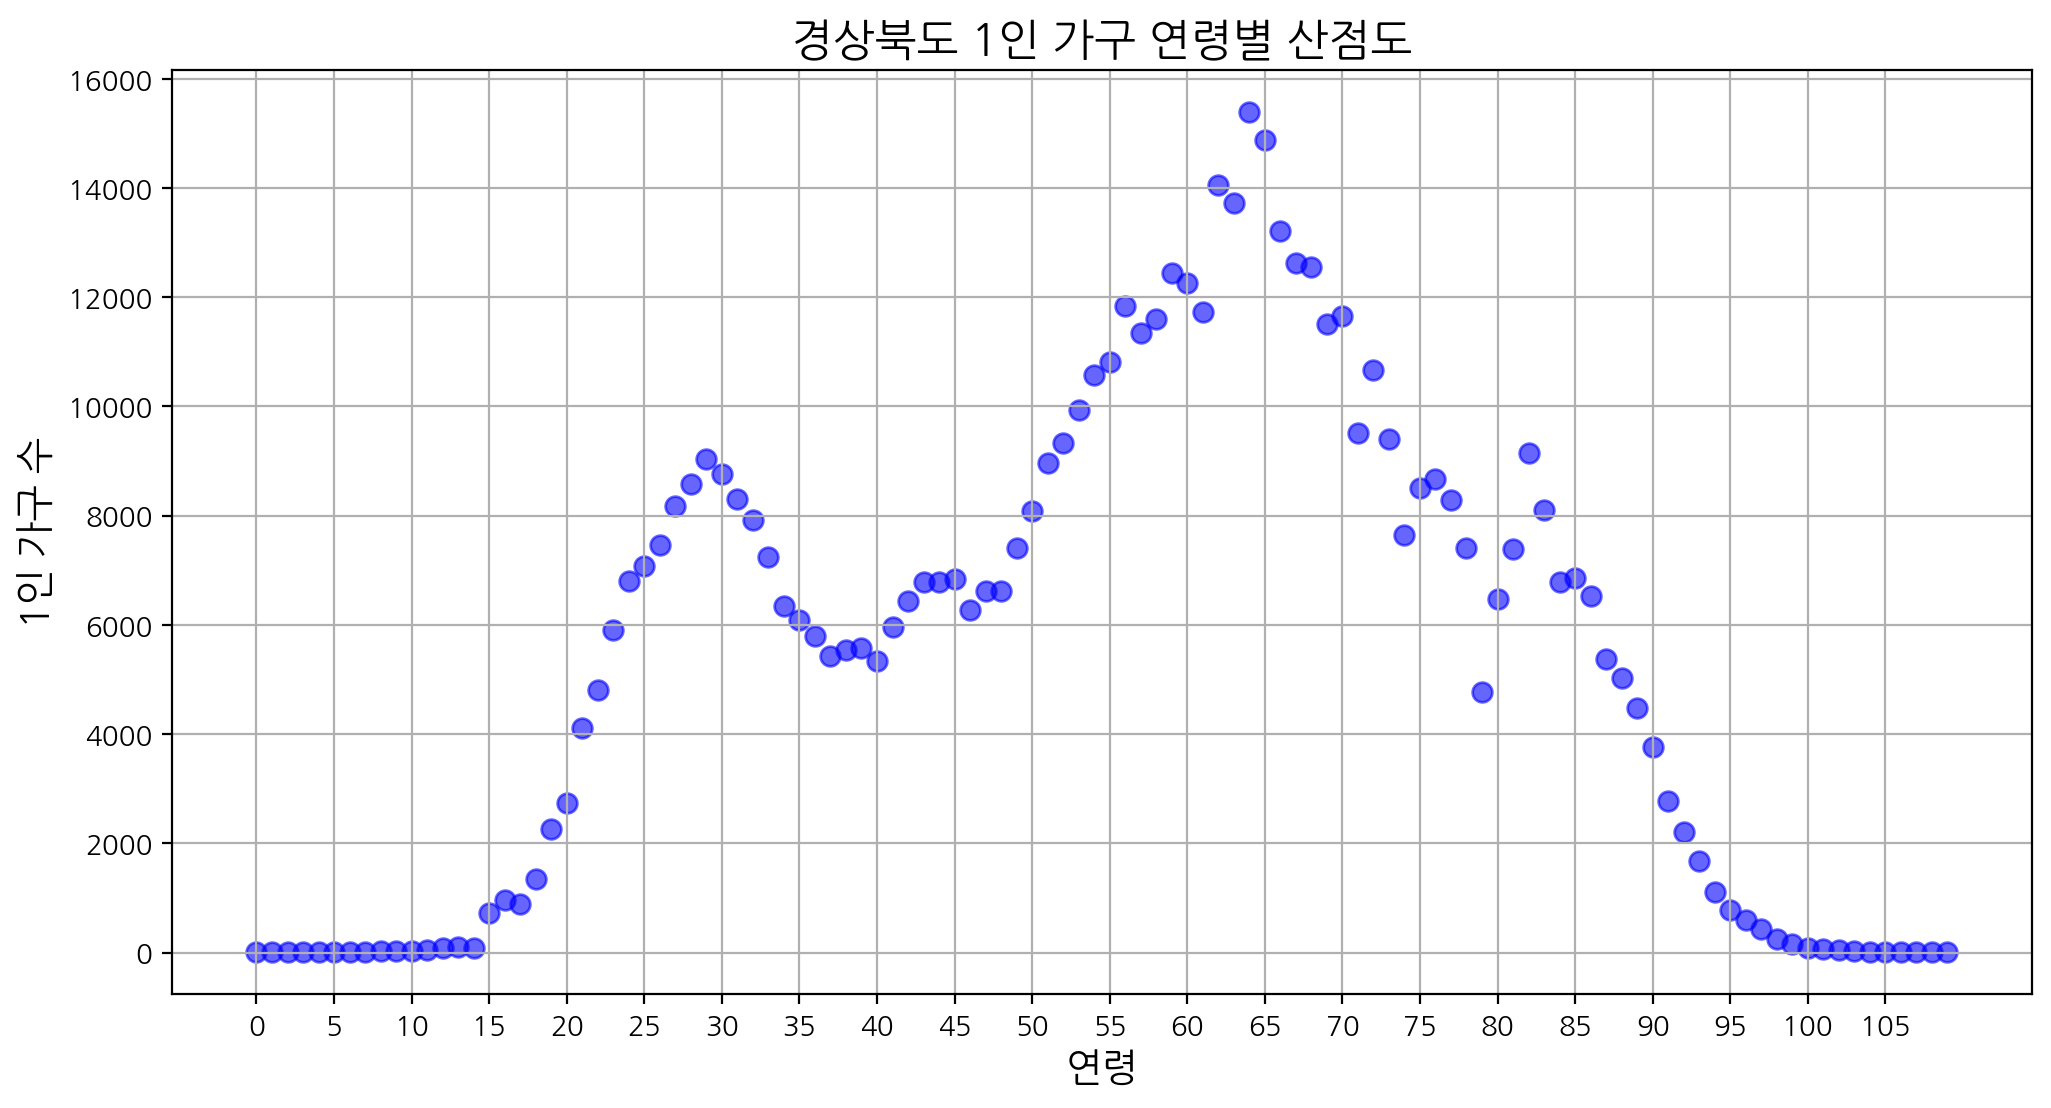

In [102]:
import matplotlib.pyplot as plt

age_totals = {}

for col in gyeongsangbuk_df.columns:
    if '세남자' in col or '세여자' in col:
        # 연령 숫자만 추출 (예: '23세남자' → 23)
        age = int(col.replace('세남자', '').replace('세여자', ''))
        count = gyeongsangbuk_df[col].sum()
        # 해당 나이 값에 누적
        if age in age_totals:
            age_totals[age] += count
        else:
            age_totals[age] = count

ages = sorted(age_totals.keys())
counts = [age_totals[age] for age in ages]

plt.figure(figsize=(12, 6))
plt.scatter(ages, counts, c='blue', alpha=0.6, s=50)
plt.title("경상북도 1인 가구 연령별 산점도", fontsize=16)
plt.xlabel("연령", fontsize=14)
plt.ylabel("1인 가구 수", fontsize=14)

# x축 눈금을 5세 단위로 표시
plt.xticks(ticks=range(min(ages), max(ages)+1, 5))

plt.grid(True)
plt.show()

In [103]:
most_common_age = max(age_totals, key=age_totals.get)
most_common_total = age_totals[most_common_age]

print(f"✅ 경상북도에서 1인 가구 수가 가장 많은 연령은 {most_common_age}세이며, 총 {most_common_total:,}가구입니다.")


✅ 경상북도에서 1인 가구 수가 가장 많은 연령은 64세이며, 총 15,384가구입니다.


csv 파일에서 경상남도만 분류

In [104]:
gyeongsangnam_df = df[df['시도명'] == '경상남도'].copy()

gyeongsangnam_df

,시도명,시군구명,읍면동명,계,남자,여자,0세남자,1세남자,2세남자,3세남자,...,101세여자,102세여자,103세여자,104세여자,105세여자,106세여자,107세여자,108세여자,109세여자,110세이상 여자
2825,경상남도,창원시 의창구,동읍,3810,1914,1896,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2826,경상남도,창원시 의창구,북면,4411,2295,2116,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2827,경상남도,창원시 의창구,대산면,1804,921,883,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2828,경상남도,창원시 의창구,의창동,7283,3813,3470,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2829,경상남도,창원시 의창구,팔룡동,4205,2318,1887,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3130,경상남도,합천군,쌍백면,646,280,366,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3131,경상남도,합천군,삼가면,1067,424,643,0,0,0,1,...,2,0,0,0,0,0,0,0,0,0
3132,경상남도,합천군,가회면,564,268,296,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3133,경상남도,합천군,대병면,660,291,369,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


경상남도 1인가구 남자 여자 총합 비율

In [105]:
from tabulate import tabulate

# 결측값 처리
gyeongsangnam_df['남자'] = gyeongsangnam_df['남자'].fillna(0)
gyeongsangnam_df['여자'] = gyeongsangnam_df['여자'].fillna(0)

# 시군구별로 남자/여자 1인 세대 합산
gyeongsangnam_by_city = gyeongsangnam_df.groupby('시군구명')[['남자', '여자']].sum().reset_index()

# 총합 및 비율 계산
gyeongsangnam_by_city['총합'] = gyeongsangnam_by_city['남자'] + gyeongsangnam_by_city['여자']
gyeongsangnam_by_city['남자비율'] = (gyeongsangnam_by_city['남자'] / gyeongsangnam_by_city['총합']) * 100
gyeongsangnam_by_city['여자비율'] = (gyeongsangnam_by_city['여자'] / gyeongsangnam_by_city['총합']) * 100

# 소수점 2자리로 반올림
gyeongsangnam_by_city['남자비율'] = gyeongsangnam_by_city['남자비율'].round(2)
gyeongsangnam_by_city['여자비율'] = gyeongsangnam_by_city['여자비율'].round(2)

# 결과 출력 (열 맞춤)
print(tabulate(gyeongsangnam_by_city[['시군구명', '남자', '여자', '총합', '남자비율', '여자비율']],
               headers=['시군구명', '남자', '여자', '총합', '남자비율(%)', '여자비율(%)'],
               tablefmt='plain',
               showindex=False))

시군구명             남자    여자    총합    남자비율(%)    여자비율(%)
거제시              25378   16469   41847          60.64          39.36
거창군               7010    8125   15135          46.32          53.68
고성군               6810    6760   13570          50.18          49.82
김해시              46276   39169   85445          54.16          45.84
남해군               4877    6377   11254          43.34          56.66
밀양시              12840   13879   26719          48.06          51.94
사천시              13746   12640   26386          52.1           47.9
산청군               5210    5710   10920          47.71          52.29
양산시              32239   29807   62046          51.96          48.04
의령군               4098    4485    8583          47.75          52.25
진주시              33875   35562   69437          48.79          51.21
창녕군               8235    8846   17081          48.21          51.79
창원시 마산합포구   18221   18854   37075          49.15          50.85
창원시 마산회원구   15681   16479   32160          48.76       

경상남도 1인가구 상위 5개지역

In [107]:
from tabulate import tabulate

# 결측값 처리
gyeongsangnam_df['남자'] = gyeongsangnam_df['남자'].fillna(0)
gyeongsangnam_df['여자'] = gyeongsangnam_df['여자'].fillna(0)

# 총 1인 가구 수 열 생성
gyeongsangnam_df['총합'] = gyeongsangnam_df['남자'] + gyeongsangnam_df['여자']

# 총합 기준으로 내림차순 정렬 후 상위 5개 출력
top_area = gyeongsangnam_df.sort_values(by='총합', ascending=False).head(5)

# 결과 출력 (열 맞춤)
print(tabulate(top_area[['시군구명', '읍면동명', '남자', '여자', '총합']],
               headers=['시군구명', '읍면동명', '남자', '여자', '총합'],
               tablefmt='plain',
               showindex=False))

시군구명       읍면동명      남자    여자    총합
양산시         물금읍        7794    7962   15756
김해시         내외동        6395    6225   12620
창원시 성산구  중앙동        6760    3923   10683
김해시         북부동        5252    5044   10296
진주시         가호동        5451    4422    9873


경상남도 1인가구 하위 5개지역

In [108]:
from tabulate import tabulate

# 결측값 처리
gyeongsangnam_df['남자'] = gyeongsangnam_df['남자'].fillna(0)
gyeongsangnam_df['여자'] = gyeongsangnam_df['여자'].fillna(0)

# 총 1인 가구 수 열 생성
gyeongsangnam_df['총합'] = gyeongsangnam_df['남자'] + gyeongsangnam_df['여자']

# 총합 기준으로 오름차순 정렬 후 상위 5개 출력
top_area = gyeongsangnam_df.sort_values(by='총합').head(5)

# 결과 출력 (열 간격 맞춤)
print(tabulate(top_area[['시군구명', '읍면동명', '남자', '여자', '총합']],
               headers=['시군구명', '읍면동명', '남자', '여자', '총합'],
               tablefmt='plain',
               showindex=False))

시군구명    읍면동명            남자    여자    총합
사천시      신수출장소            28      44      72
거제시      사등면가조출장소     146     141     287
함안군      여항면               162     126     288
진주시      대평면               123     168     291
의령군      낙서면               121     173     294


경상남도 1인 가구 수 산점도 그래프 시각화

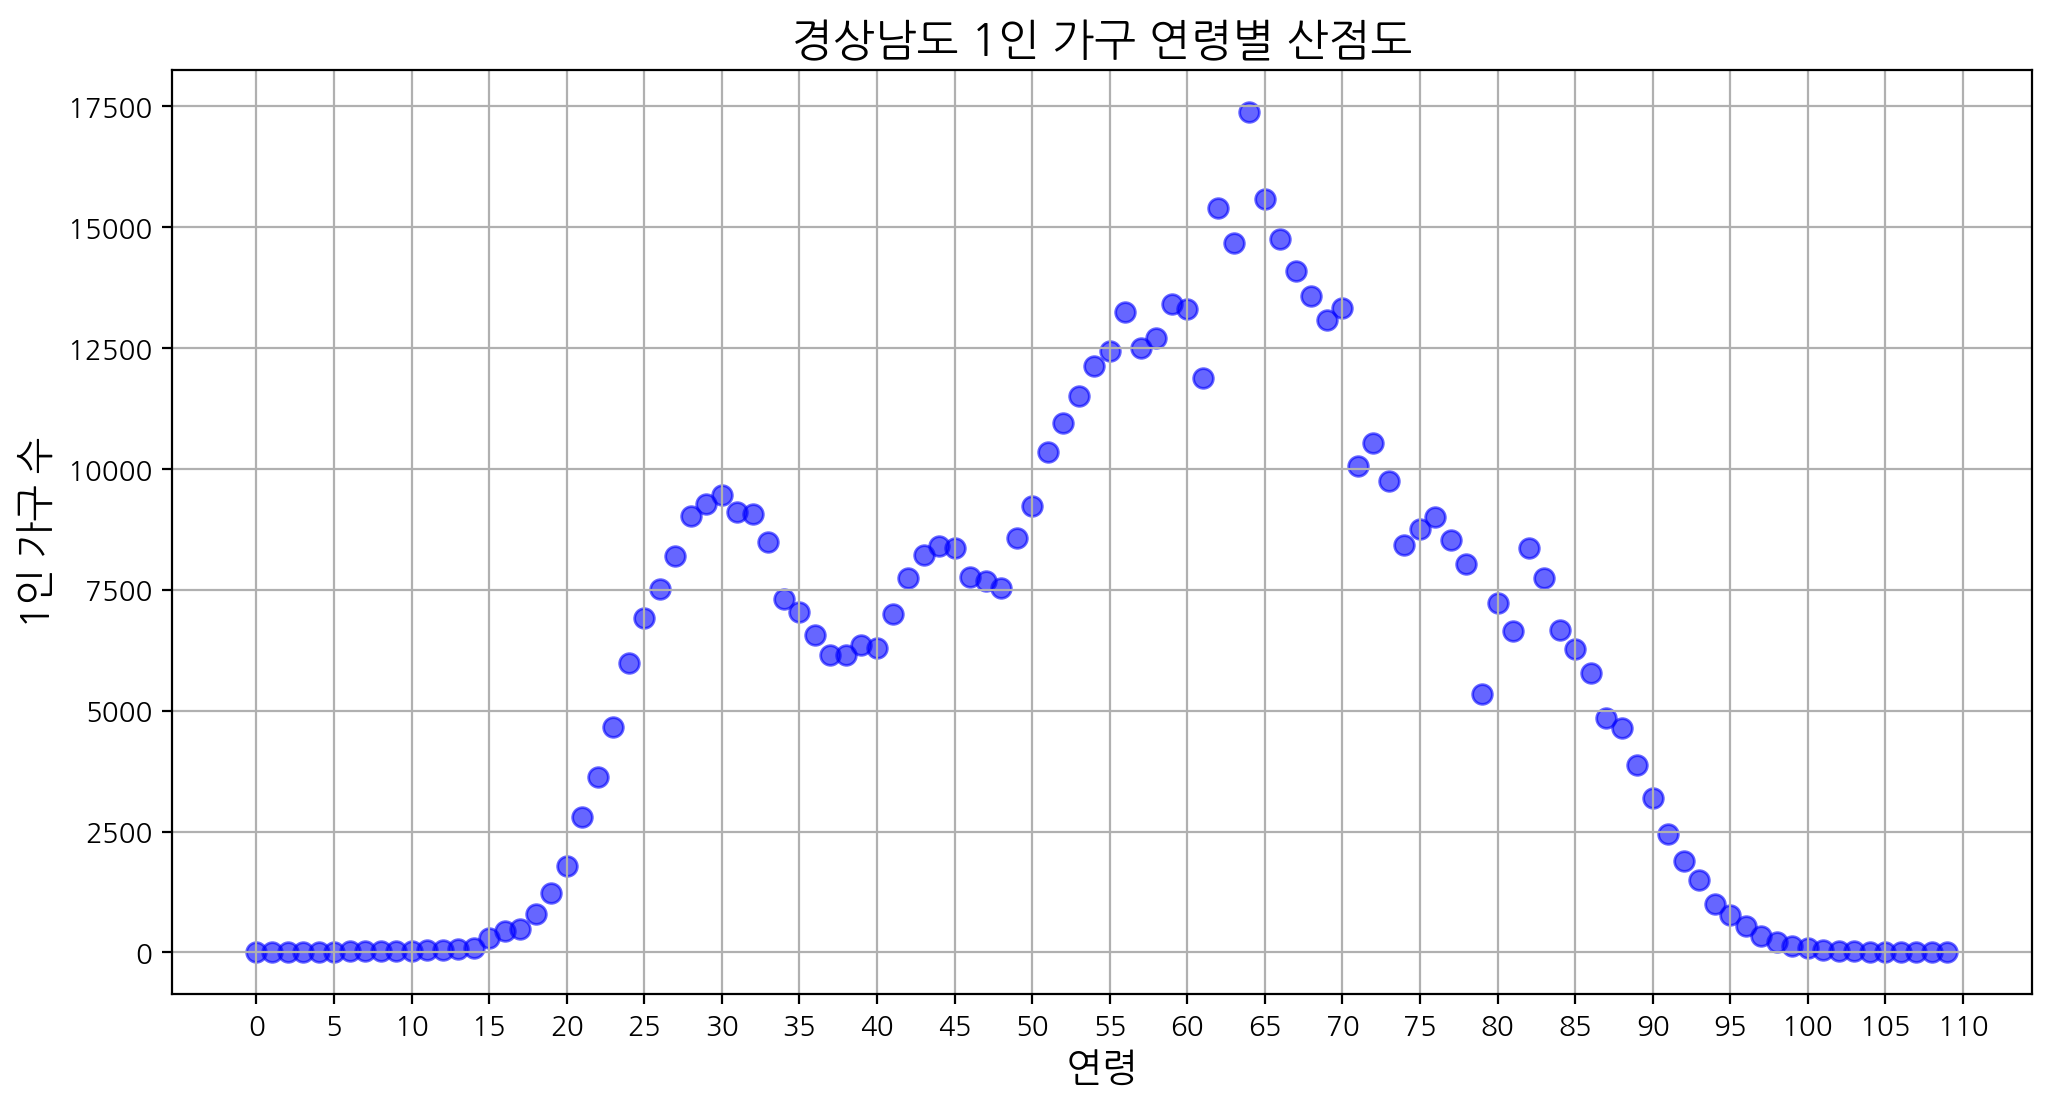

In [111]:
import matplotlib.pyplot as plt

# 기존 코드 유지
age_totals = {}  # 혹시 초기화 안 되어 있으면 꼭 초기화 필요!

for col in gyeongsangnam_df.columns:
    if '세남자' in col or '세여자' in col:
        # 연령 숫자만 추출 (예: '23세남자' → 23)
        age = int(col.replace('세남자', '').replace('세여자', ''))
        count = gyeongsangnam_df[col].sum()
        # 해당 나이 값에 누적
        if age in age_totals:
            age_totals[age] += count
        else:
            age_totals[age] = count

ages = sorted(age_totals.keys())
counts = [age_totals[age] for age in ages]

# 산점도 시각화
plt.figure(figsize=(12, 6))
plt.scatter(ages, counts, c='blue', alpha=0.6, s=50)
plt.title("경상남도 1인 가구 연령별 산점도", fontsize=16)
plt.xlabel("연령", fontsize=14)
plt.ylabel("1인 가구 수", fontsize=14)

# x축 5세 간격 눈금 설정
plt.xticks(range(0, max(ages)+5, 5))

plt.grid(True)
plt.show()

In [112]:
most_common_age = max(age_totals, key=age_totals.get)
most_common_total = age_totals[most_common_age]

print(f"✅ 경상남도에서 1인 가구 수가 가장 많은 연령은 {most_common_age}세이며, 총 {most_common_total:,}가구입니다.")


✅ 경상남도에서 1인 가구 수가 가장 많은 연령은 64세이며, 총 17,371가구입니다.


csv 파일에서 제주도만 분류

In [113]:
jeju_df = df[df['시도명'] == '제주특별자치도'].copy()

jeju_df

,시도명,시군구명,읍면동명,계,남자,여자,0세남자,1세남자,2세남자,3세남자,...,101세여자,102세여자,103세여자,104세여자,105세여자,106세여자,107세여자,108세여자,109세여자,110세이상 여자
3135,제주특별자치도,제주시,한림읍,5260,2840,2420,0,0,0,0,...,1,3,0,0,0,0,1,0,0,0
3136,제주특별자치도,제주시,애월읍,7923,4363,3560,0,0,0,0,...,1,3,1,0,0,0,0,0,0,0
3137,제주특별자치도,제주시,구좌읍,4217,2179,2038,0,0,0,0,...,1,1,0,1,0,0,0,0,0,0
3138,제주특별자치도,제주시,조천읍,5174,2691,2483,0,0,0,0,...,1,3,1,1,1,0,0,0,0,0
3139,제주특별자치도,제주시,한경면,2618,1328,1290,0,0,0,0,...,4,3,0,0,0,0,0,0,0,0
3140,제주특별자치도,제주시,추자면,605,363,242,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3141,제주특별자치도,제주시,우도면,430,234,196,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3142,제주특별자치도,제주시,일도1동,830,470,360,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3143,제주특별자치도,제주시,일도2동,4944,2417,2527,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3144,제주특별자치도,제주시,이도1동,2260,1138,1122,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1


 제주도 1인가구 남자 여자 총합 비율

In [118]:
from tabulate import tabulate

# 결측값 처리
jeju_df['남자'] = jeju_df['남자'].fillna(0)
jeju_df['여자'] = jeju_df['여자'].fillna(0)

# 시군구별 남자/여자 1인 세대 합산
jeju_by_city = jeju_df.groupby('시군구명')[['남자', '여자']].sum().reset_index()

# 총합 및 비율 계산
jeju_by_city['총합'] = jeju_by_city['남자'] + jeju_by_city['여자']
jeju_by_city['남자비율'] = (jeju_by_city['남자'] / jeju_by_city['총합']) * 100
jeju_by_city['여자비율'] = (jeju_by_city['여자'] / jeju_by_city['총합']) * 100

# 총합 기준 내림차순 정렬
jeju_by_city_sorted = jeju_by_city.sort_values(by='총합', ascending=False)

# 결과 출력 (열 간격 맞춤)
print(tabulate(
    jeju_by_city_sorted[['시군구명', '남자', '여자', '총합', '남자비율', '여자비율']],
    headers=['시군구명', '남자', '여자', '총합', '남자비율', '여자비율(%)'],
    tablefmt='plain',
    showindex=False,
    floatfmt=".2f"
))

시군구명      남자    여자    총합    남자비율    여자비율(%)
제주시       49918   46395   96313       51.83          48.17
서귀포시     21157   19381   40538       52.19          47.81


제주도 1인가구 상위 5개 지역

In [119]:
from tabulate import tabulate

# 결측값 처리
jeju_df['남자'] = jeju_df['남자'].fillna(0)
jeju_df['여자'] = jeju_df['여자'].fillna(0)

# 총 1인 가구 수 열 생성
jeju_df['총합'] = jeju_df['남자'] + jeju_df['여자']

# 총합 기준으로 내림차순 정렬 후 상위 5개 출력
top_area = jeju_df.sort_values(by='총합', ascending=False).head(5)

# 결과 출력 (열 간격 맞춤)
print(tabulate(
    top_area[['시군구명', '읍면동명', '남자', '여자', '총합']],
    headers=['시군구명', '읍면동명', '남자', '여자', '총합'],
    tablefmt='plain',
    showindex=False
))

시군구명    읍면동명      남자    여자    총합
제주시      연동          6070    6049   12119
제주시      노형동        4665    4820    9485
제주시      이도2동       4123    4214    8337
제주시      애월읍        4363    3560    7923
제주시      아라동        3776    3323    7099


제주도 1인가구 하위 5개 지역

In [120]:
from tabulate import tabulate

# 결측값 처리
jeju_df['남자'] = jeju_df['남자'].fillna(0)
jeju_df['여자'] = jeju_df['여자'].fillna(0)

# 총 1인 가구 수 열 생성
jeju_df['총합'] = jeju_df['남자'] + jeju_df['여자']

# 총합 기준으로 오름차순 정렬 후 상위 5개 출력
top_area = jeju_df.sort_values(by='총합').head(5)

# 결과 출력 (열 간격 맞춤)
print(tabulate(
    top_area[['시군구명', '읍면동명', '남자', '여자', '총합']],
    headers=['시군구명', '읍면동명', '남자', '여자', '총합'],
    tablefmt='plain',
    showindex=False
))

시군구명    읍면동명      남자    여자    총합
제주시      우도면         234     196     430
제주시      추자면         363     242     605
제주시      이호동         421     299     720
제주시      도두동         471     303     774
제주시      일도1동        470     360     830


제주도 1인 가구 수 산점도 그래프 시각화

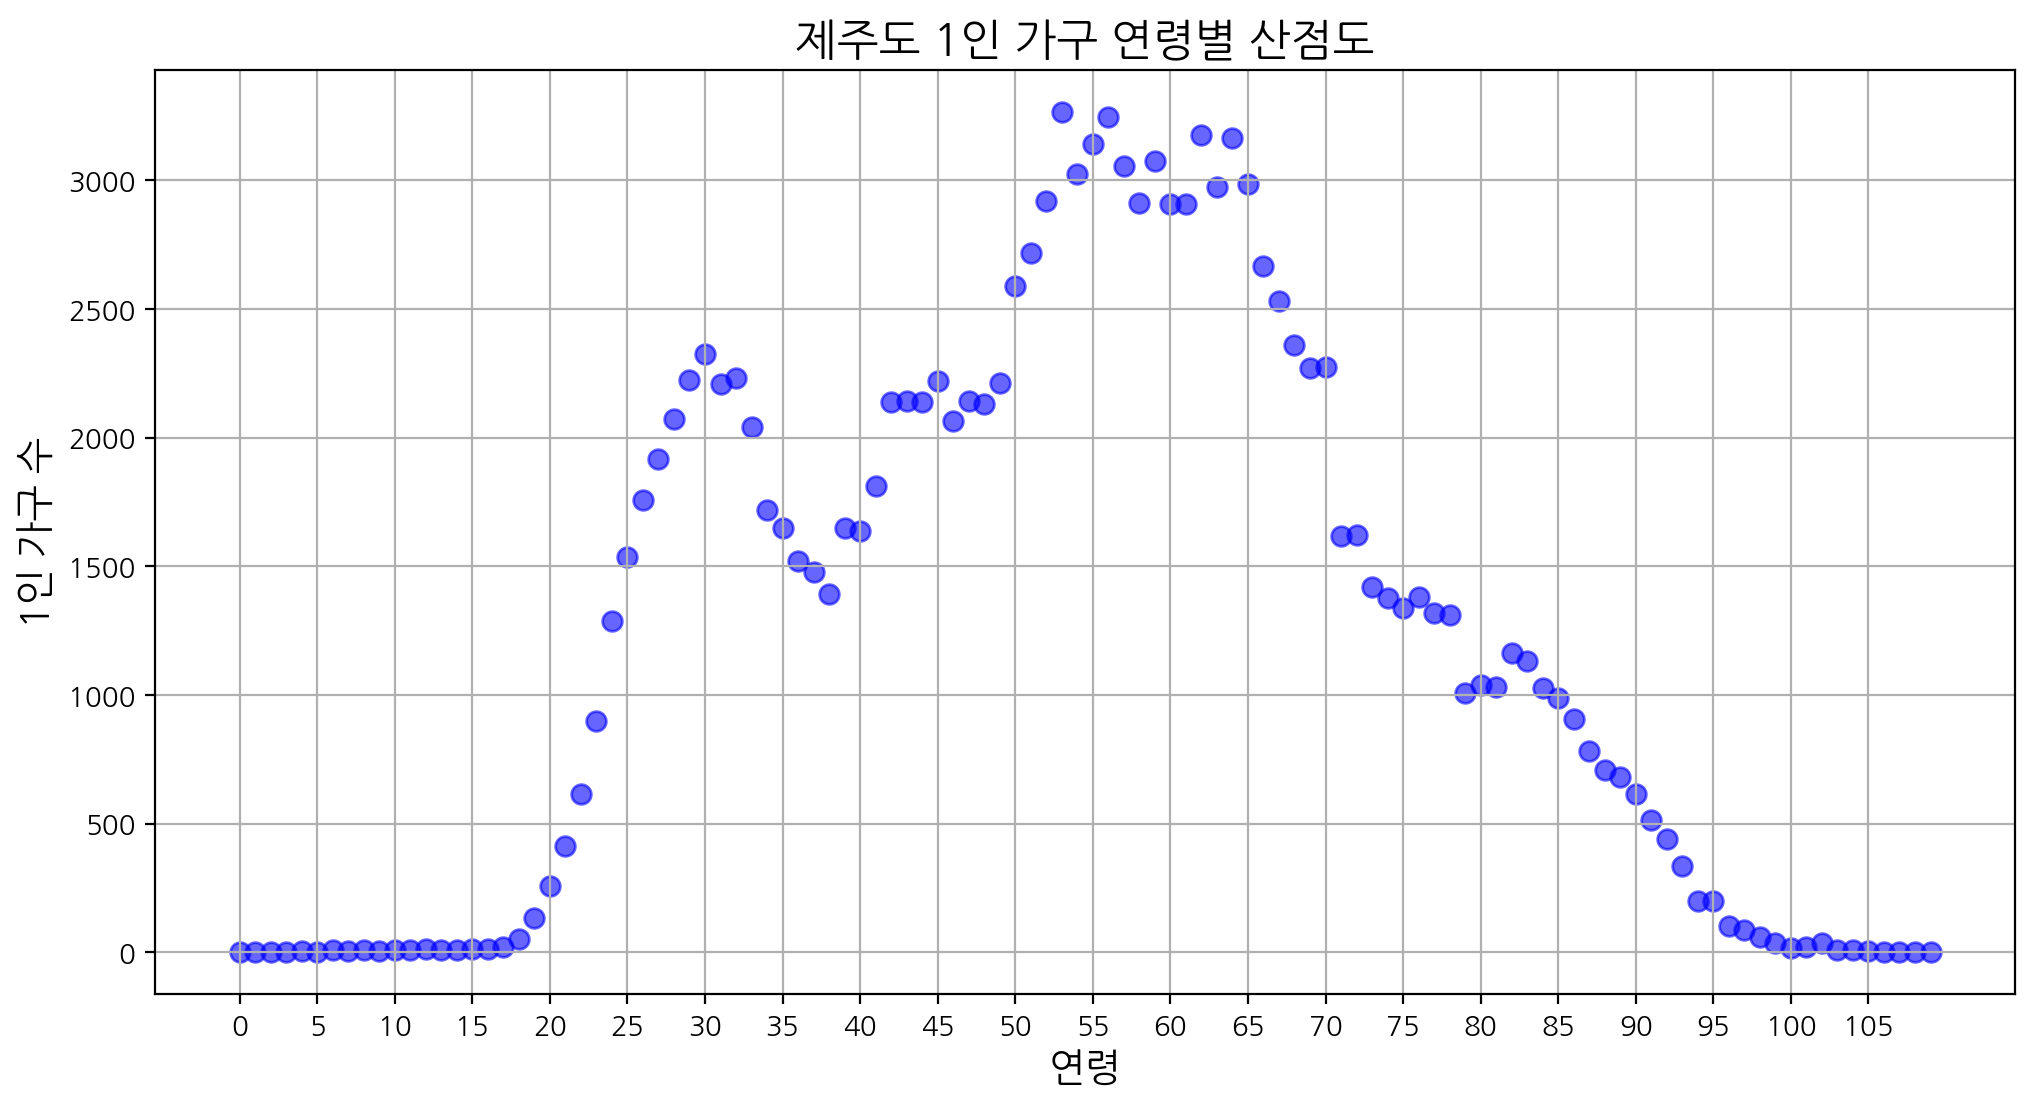

In [121]:
import matplotlib.pyplot as plt
import numpy as np

age_totals = {}

for col in jeju_df.columns:
    if '세남자' in col or '세여자' in col:
        # 연령 숫자만 추출 (예: '23세남자' → 23)
        age = int(col.replace('세남자', '').replace('세여자', ''))
        count = jeju_df[col].sum()
        # 해당 나이 값에 누적
        if age in age_totals:
            age_totals[age] += count
        else:
            age_totals[age] = count

ages = sorted(age_totals.keys())
counts = [age_totals[age] for age in ages]

plt.figure(figsize=(12, 6))
plt.scatter(ages, counts, c='blue', alpha=0.6, s=50)
plt.title("제주도 1인 가구 연령별 산점도", fontsize=16)
plt.xlabel("연령", fontsize=14)
plt.ylabel("1인 가구 수", fontsize=14)
plt.grid(True)

# 5세 단위로 x축 눈금 설정
plt.xticks(np.arange(min(ages), max(ages)+1, 5))

plt.show()

csv 파일에서 대구광역시만 분류

In [123]:
most_common_age = max(age_totals, key=age_totals.get)
most_common_total = age_totals[most_common_age]

print(f"✅ 제주도에서 1인 가구 수가 가장 많은 연령대는 '{most_common_age}세'이며, 총 {most_common_total:,}가구입니다.")

✅ 제주도에서 1인 가구 수가 가장 많은 연령대는 '53세'이며, 총 3,263가구입니다.


In [124]:
daejeon_df = df[df['시도명'] == '대전광역시'].copy()

daejeon_df

,시도명,시군구명,읍면동명,계,남자,여자,0세남자,1세남자,2세남자,3세남자,...,101세여자,102세여자,103세여자,104세여자,105세여자,106세여자,107세여자,108세여자,109세여자,110세이상 여자
1040,대전광역시,동구,중앙동,1958,1215,743,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1041,대전광역시,동구,효동,3242,1574,1668,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1042,대전광역시,동구,신인동,2509,1106,1403,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1043,대전광역시,동구,판암1동,2724,1200,1524,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1044,대전광역시,동구,판암2동,3401,1595,1806,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,대전광역시,대덕구,석봉동,2043,1150,893,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1118,대전광역시,대덕구,덕암동,3308,2006,1302,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1119,대전광역시,대덕구,목상동,1588,1043,545,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1120,대전광역시,대덕구,법1동,2350,918,1432,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


대전광역시 1인가구 남자 여자 총합 비율

In [125]:
from tabulate import tabulate

# 결측값 처리
daejeon_df['남자'] = daejeon_df['남자'].fillna(0)
daejeon_df['여자'] = daejeon_df['여자'].fillna(0)

# 시군구별로 남자/여자 1인 세대 합산
daejeon_by_city = daejeon_df.groupby('시군구명')[['남자', '여자']].sum().reset_index()

# 총합 및 비율 계산
daejeon_by_city['총합'] = daejeon_by_city['남자'] + daejeon_by_city['여자']
daejeon_by_city['남자비율'] = (daejeon_by_city['남자'] / daejeon_by_city['총합']) * 100
daejeon_by_city['여자비율'] = (daejeon_by_city['여자'] / daejeon_by_city['총합']) * 100

# 정렬(총합 내림차순)
daejeon_by_city_sorted = daejeon_by_city.sort_values(by='총합', ascending=False)

# 결과 출력 (열 간격 맞춤)
print(tabulate(
    daejeon_by_city_sorted[['시군구명', '남자', '여자', '총합', '남자비율', '여자비율']],
    headers=['시군구명', '남자', '여자', '총합', '남자비율(%)', '여자비율(%)'],
    tablefmt='plain',
    showindex=False,
    floatfmt=".2f"
))

시군구명      남자    여자    총합    남자비율(%)    여자비율(%)
서구         46393   49315   95708          48.47          51.53
유성구       40136   32465   72601          55.28          44.72
동구         28274   25933   54207          52.16          47.84
중구         22777   24164   46941          48.52          51.48
대덕구       18361   16132   34493          53.23          46.77


대전광역시 1인가구 상위 5개지역

In [126]:
from tabulate import tabulate

# 결측값 처리
daejeon_df['남자'] = daejeon_df['남자'].fillna(0)
daejeon_df['여자'] = daejeon_df['여자'].fillna(0)

# 총 1인 가구 수 열 생성
daejeon_df['총합'] = daejeon_df['남자'] + daejeon_df['여자']

# 총합 기준으로 내림차순 정렬 후 상위 5개 출력
top_area = daejeon_df.sort_values(by='총합', ascending=False).head(5)

# 결과 출력 (열 간격 맞춤)
print(tabulate(
    top_area[['시군구명', '읍면동명', '남자', '여자', '총합']],
    headers=['시군구명', '읍면동명', '남자', '여자', '총합'],
    tablefmt='plain',
    showindex=False
))

시군구명    읍면동명      남자    여자    총합
유성구      온천1동       7455    6003   13458
유성구      온천2동       7540    5165   12705
서구        탄방동        4088    4700    8788
서구        갈마2동       4320    3745    8065
서구        괴정동        3867    3932    7799


대전광역시 1인가구 하위 5개 지역

In [127]:
from tabulate import tabulate

# 결측값 처리
daejeon_df['남자'] = daejeon_df['남자'].fillna(0)
daejeon_df['여자'] = daejeon_df['여자'].fillna(0)

# 총 1인 가구 수 열 생성
daejeon_df['총합'] = daejeon_df['남자'] + daejeon_df['여자']

# 총합 기준으로 오름차순 정렬 후 상위 5개 출력
top_area = daejeon_df.sort_values(by='총합').head(5)

# 결과 출력 (열 간격 맞춤)
print(tabulate(
    top_area[['시군구명', '읍면동명', '남자', '여자', '총합']],
    headers=['시군구명', '읍면동명', '남자', '여자', '총합'],
    tablefmt='plain',
    showindex=False
))

시군구명    읍면동명      남자    여자    총합
동구        대청동         290     257     547
서구        기성동         563     483    1046
서구        둔산1동        493     605    1098
중구        목동           519     737    1256
서구        월평3동        509     915    1424


대전광역시 1인 가구 수 산점도 그래프 시각화

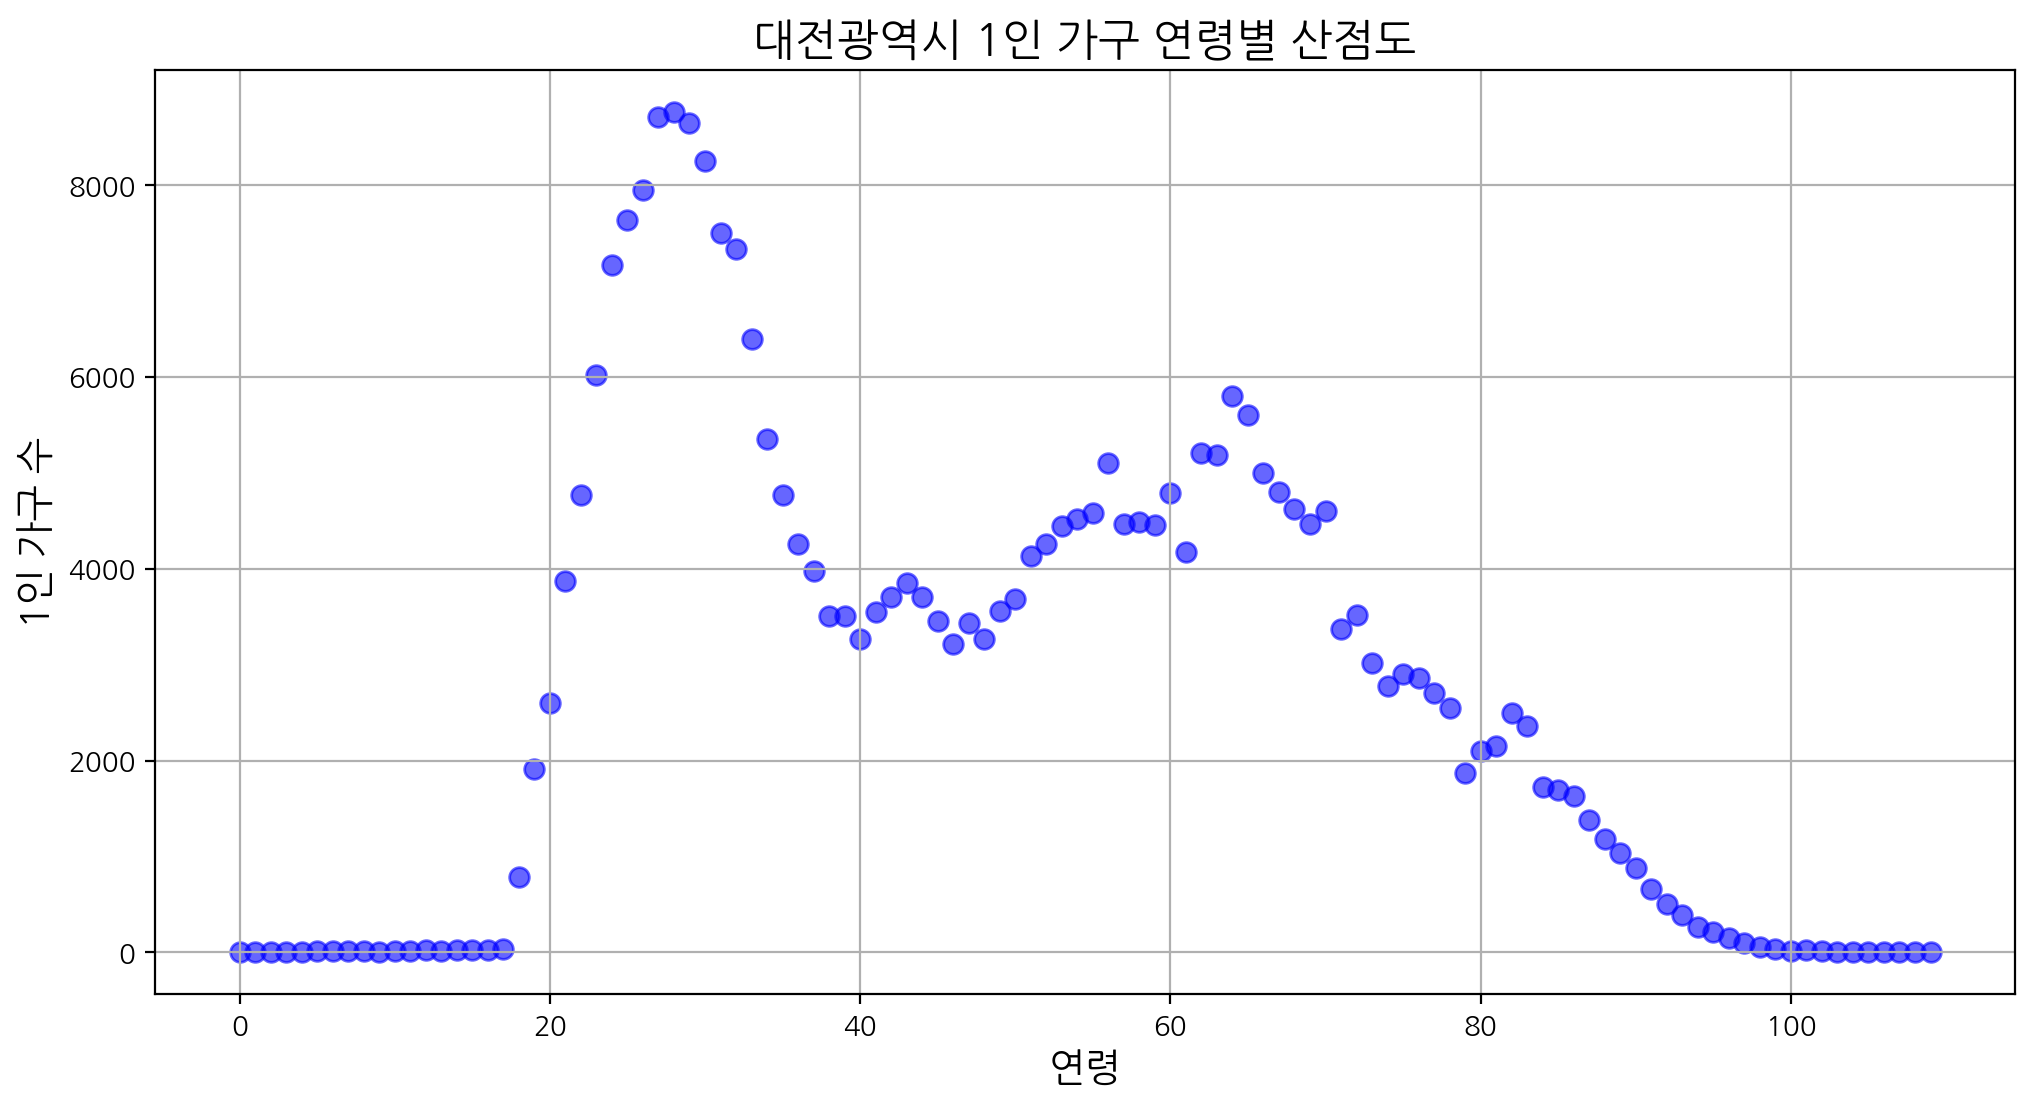

In [130]:
age_totals = {}

for col in daejeon_df.columns:
    if '세남자' in col or '세여자' in col:
        # 연령 숫자만 추출 (예: '23세남자' → 23)
        age = int(col.replace('세남자', '').replace('세여자', ''))
        count = daejeon_df[col].sum()
        # 해당 나이 값에 누적
        if age in age_totals:
            age_totals[age] += count
        else:
            age_totals[age] = count

ages = sorted(age_totals.keys())
counts = [age_totals[age] for age in ages]

# 산점도 시각화
plt.figure(figsize=(12, 6))
plt.scatter(ages, counts, c='blue', alpha=0.6, s=50)
plt.title("대전광역시 1인 가구 연령별 산점도", fontsize=16)
plt.xlabel("연령", fontsize=14)
plt.ylabel("1인 가구 수", fontsize=14)
plt.grid(True)
plt.show()

In [131]:
# age_totals는 {age_group: count} 형태의 딕셔너리라고 가정

most_common_age = max(age_totals, key=age_totals.get)       # 가장 큰 값의 key (연령대)
most_common_total = age_totals[most_common_age]             # 해당 연령대의 가구 수

print(f"✅ 대전광역시에서 1인 가구 수가 가장 많은 연령대는 '{most_common_age}세 ~ {most_common_age + 4}세'이며, 총 {most_common_total:,}가구입니다.")

✅ 대전광역시에서 1인 가구 수가 가장 많은 연령대는 '28세 ~ 32세'이며, 총 8,755가구입니다.


전북특별자치도의 1인 가구 성별 비율

In [132]:
print(gender_by_region.loc["전북특별자치도", ["남자비율", "여자비율"]].round(3))

남자비율    0.501
여자비율    0.499
Name: 전북특별자치도, dtype: float64


남자가 여자보다 0.002% 높다

전북특별자치도의 총 1인 가구 수 (총 수, 남자 수, 여자 수)

In [133]:
print(gender_by_region.loc["전북특별자치도", ["계", "남자", "여자"]])

계     397691.0
남자    199110.0
여자    198581.0
Name: 전북특별자치도, dtype: float64


전북특별자치도에서 1인 가구 수가 가장 많은 지역 top 3

In [134]:
# 전북특별자치도 데이터만 필터링
jeonbook = df[df["시도명"] == "전북특별자치도"]

# 계 기준으로 내림차순 정렬하고 가장 많은 행 3개 출력
top_jeonbook = jeonbook.sort_values(by="계", ascending=False)[["시군구명", "읍면동명", "계"]].head(3)

print("✅ 전북특별자치도에서 1인 가구 수가 가장 많은 지역:")
print(top_jeonbook)

✅ 전북특별자치도에서 1인 가구 수가 가장 많은 지역:
         시군구명  읍면동명     계
3390  전주시 완산구  효자5동  9812
3396  전주시 덕진구   금암동  7625
3427      군산시   수송동  6842



1위는 전주 완산구 효자5동 총 9812명

2위는 전주 덕진구 금암동 총 7625명

3위는 군산 수송동 총 6842명

전북특별자치도 1인 가구 연령대별 산점도

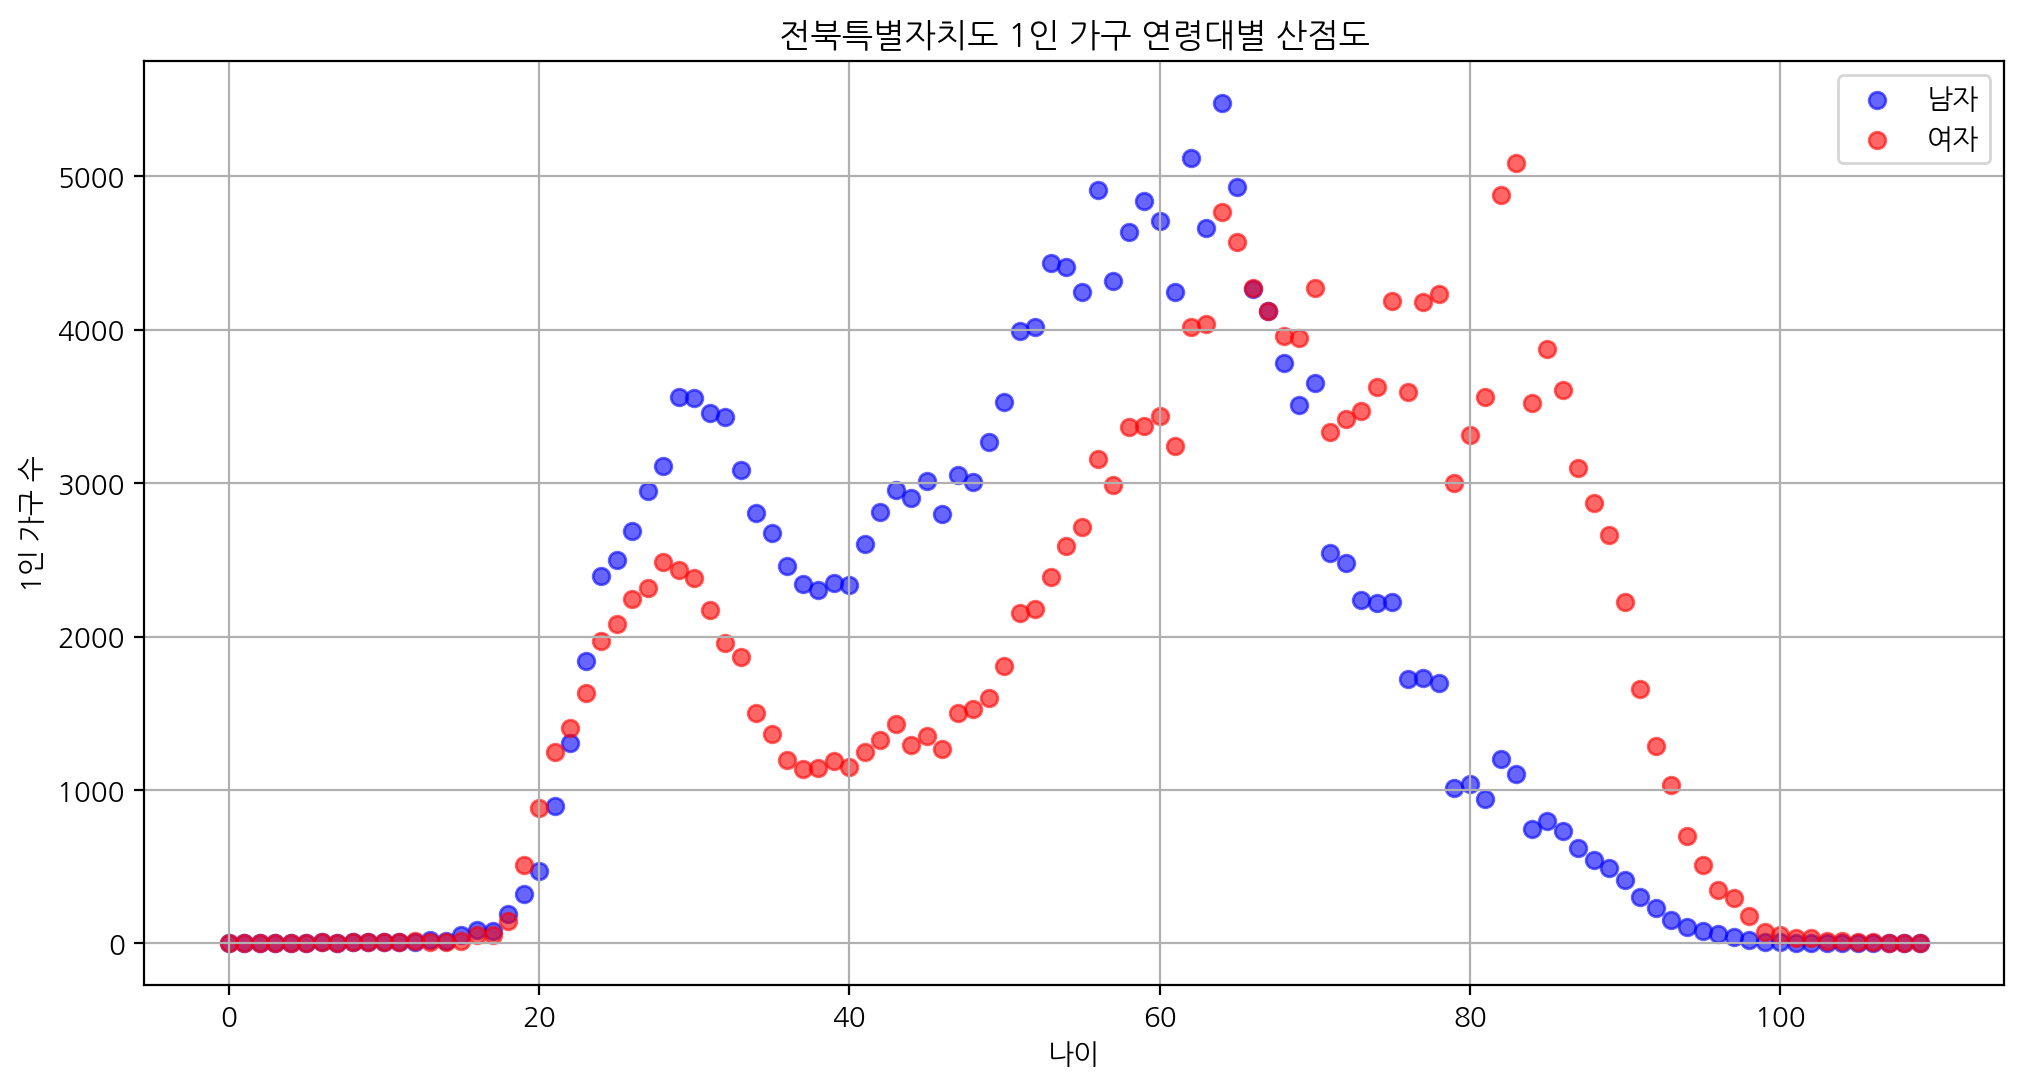

In [135]:
# 전북특별자치도 필터링
jeonbook = df[df["시도명"] == "전북특별자치도"]

# 연령 관련 열 분리
male_columns = [col for col in jeonbook.columns if "세" in col and "남자" in col]
female_columns = [col for col in jeonbook.columns if "세" in col and "여자" in col]

# 남자 데이터
male_ages = []
male_totals = []
for col in male_columns:
    try:
        age = int(col.replace("세남자", ""))
        total = jeonbook[col].sum()
        male_ages.append(age)
        male_totals.append(total)
    except:
        continue

# 여자 데이터
female_ages = []
female_totals = []
for col in female_columns:
    try:
        age = int(col.replace("세여자", ""))
        total = jeonbook[col].sum()
        female_ages.append(age)
        female_totals.append(total)
    except:
        continue

# 시각화
plt.figure(figsize=(12, 6))
plt.scatter(male_ages, male_totals, color='blue', alpha=0.6, label='남자')
plt.scatter(female_ages, female_totals, color='red', alpha=0.6, label='여자')
plt.title("전북특별자치도 1인 가구 연령대별 산점도")
plt.xlabel("나이")
plt.ylabel("1인 가구 수")
plt.legend()
plt.grid(True)
plt.show()

x축은 연령대, y축은 가구 수

남자의 경우 60대 초반 1인 가구 수가 제일 높았고 여자의 경우 80대 초반 1인 가구 수가 제일 높다

전라남도의 1인 가구 성별 비율

In [136]:
print(gender_by_region.loc["전라남도", ["남자비율", "여자비율"]].round(3))

남자비율    0.511
여자비율    0.489
Name: 전라남도, dtype: float64


남자의 비율이 여자보다 0.022% 높다

전라남도의 총 1인 가구 수 (총 수, 남자 수, 여자 수)

In [137]:
print(gender_by_region.loc["전라남도", ["계", "남자", "여자"]])

계     435051.0
남자    222281.0
여자    212770.0
Name: 전라남도, dtype: float64


전라남도에서 1인 가구 수가 가장 많은 지역 top 3

In [138]:
# 전라남도 데이터만 필터링
jeonnam = df[df["시도명"] == "전라남도"]

# 계 기준으로 내림차순 정렬하고 가장 많은 행 3개 출력
top_jeonnam = jeonnam.sort_values(by="계", ascending=False)[["시군구명", "읍면동명", "계"]].head(3)

print("✅ 전라남도에서 1인 가구 수가 가장 많은 지역:")
print(top_jeonnam)

✅ 전라남도에서 1인 가구 수가 가장 많은 지역:
     시군구명 읍면동명     계
2266  광양시  광양읍  9858
2274  광양시  중마동  9601
2340  화순군  화순읍  7700


1위는 광양 광양읍 총 9858명

2위는 광양 중마동 총 9601명

3위는 화순 화순읍 총 7700명

전라남도 1인 가구 연령대별 산점도

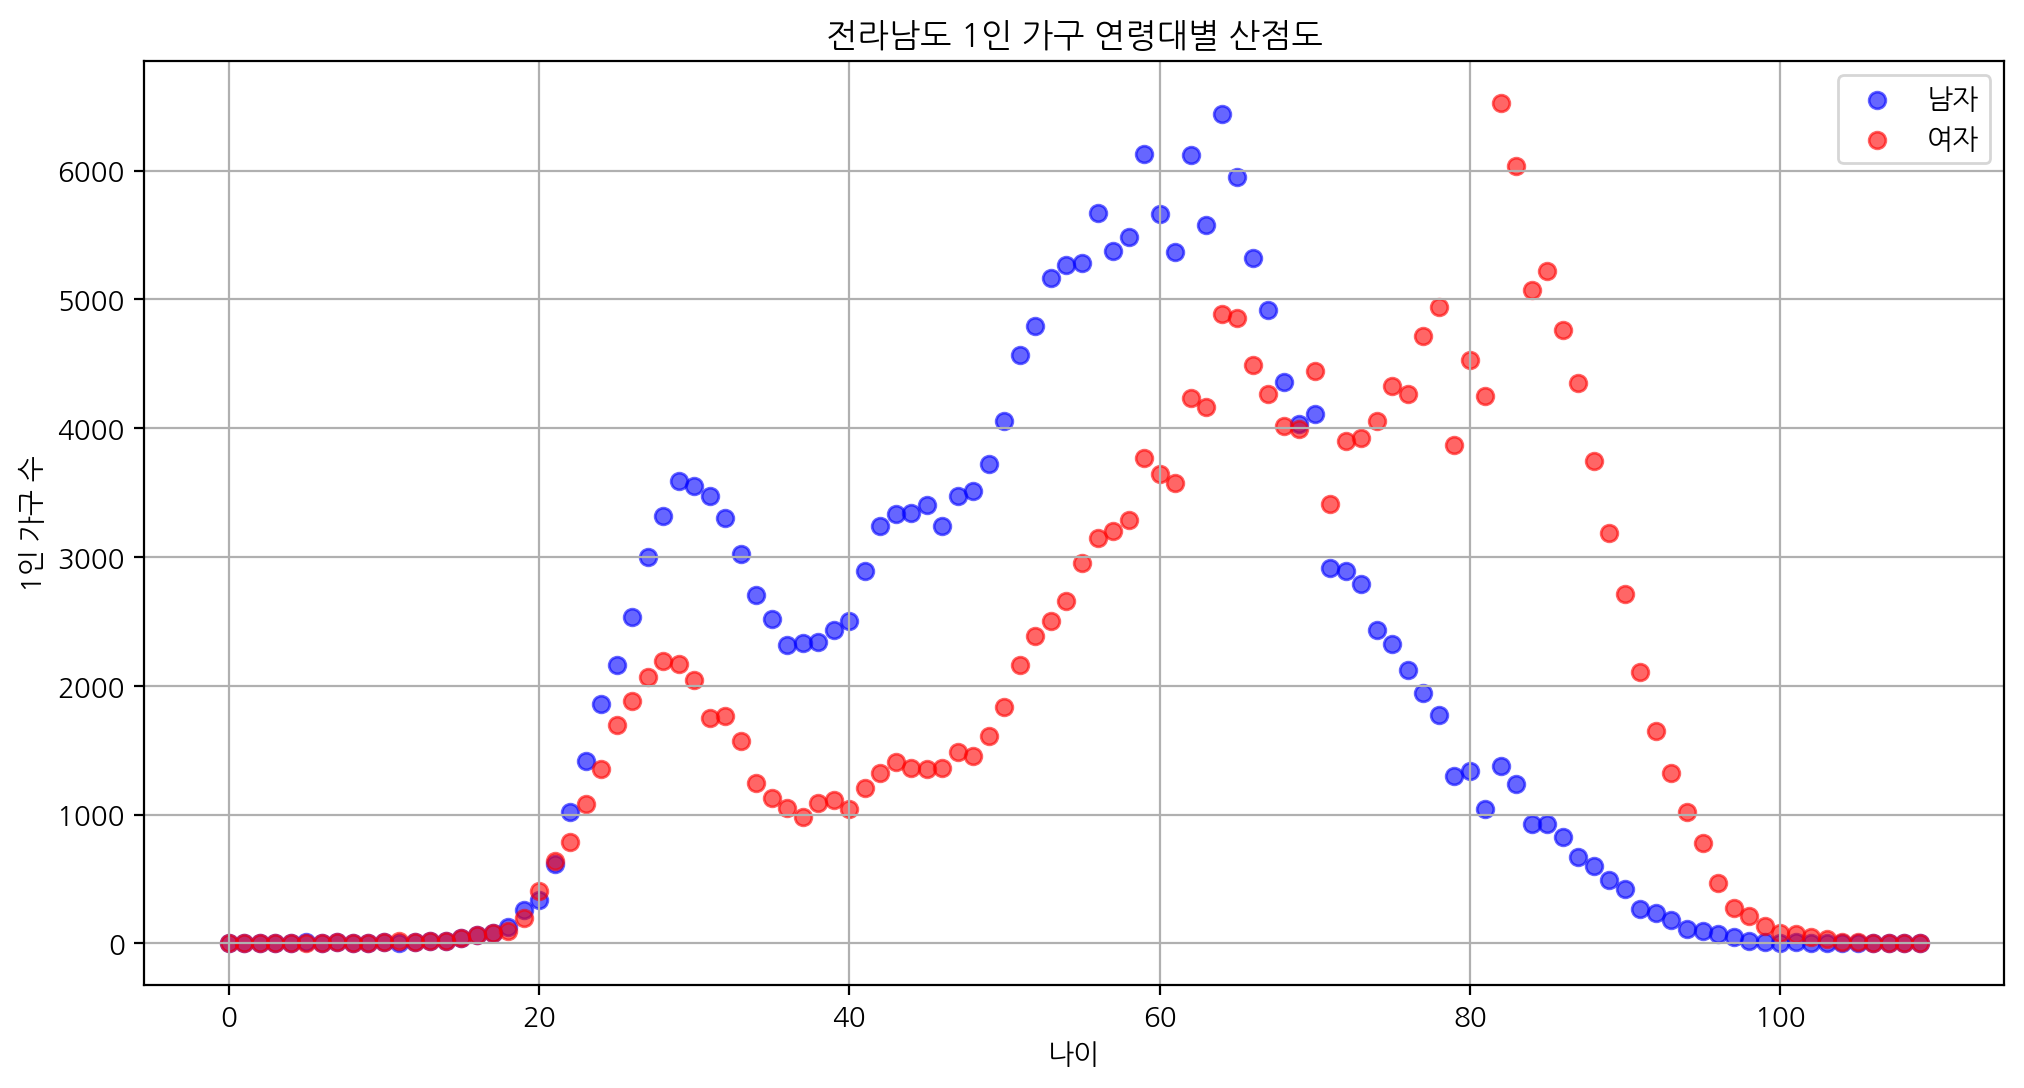

In [139]:
# 전라남도 필터링
jeonnam = df[df["시도명"] == "전라남도"]

# 연령 관련 열 분리
male_columns = [col for col in jeonnam.columns if "세" in col and "남자" in col]
female_columns = [col for col in jeonnam.columns if "세" in col and "여자" in col]

# 남자 데이터
male_ages = []
male_totals = []
for col in male_columns:
    try:
        age = int(col.replace("세남자", ""))
        total = jeonnam[col].sum()
        male_ages.append(age)
        male_totals.append(total)
    except:
        continue

# 여자 데이터
female_ages = []
female_totals = []
for col in female_columns:
    try:
        age = int(col.replace("세여자", ""))
        total = jeonnam[col].sum()
        female_ages.append(age)
        female_totals.append(total)
    except:
        continue

# 시각화
plt.figure(figsize=(12, 6))
plt.scatter(male_ages, male_totals, color='blue', alpha=0.6, label='남자')
plt.scatter(female_ages, female_totals, color='red', alpha=0.6, label='여자')
plt.title("전라남도 1인 가구 연령대별 산점도")
plt.xlabel("나이")
plt.ylabel("1인 가구 수")
plt.legend()
plt.grid(True)
plt.show()

x축은 연령대, y축은 가구 수

남자의 경우 60대 초반 1인 가구 수가 제일 높았고 여자의 경우 80대 초반 1인 가구 수가 제일 높다

공통적으로 20대 초반, 80대 후반이 1인 가구 수 비율이 적다

강원특별자치도의 1인 가구 성별 비율

In [140]:
print(gender_by_region.loc["강원특별자치도", ["남자비율", "여자비율"]].round(3))

남자비율    0.517
여자비율    0.483
Name: 강원특별자치도, dtype: float64


남자가 여자보다 0.034% 비율이 높다

강원특별자치도의 총 1인 가구 수 (총 수, 남자 수, 여자 수)

In [141]:
print(gender_by_region.loc["강원특별자치도", ["계", "남자", "여자"]])

계     351761.0
남자    181761.0
여자    170000.0
Name: 강원특별자치도, dtype: float64


강원특별자치도에서 1인 가구 수가 가장 많은 지역 top 3

In [142]:
# 강원특별자치도 데이터만 필터링
gangwon = df[df["시도명"] == "강원특별자치도"]

# 계 기준으로 내림차순 정렬하고 가장 많은 행 3개 출력
top_gangwon = gangwon.sort_values(by="계", ascending=False)[["시군구명", "읍면동명", "계"]].head(3)

print("✅ 강원특별자치도에서 1인 가구 수가 가장 많은 지역:")
print(top_gangwon)

✅ 강원특별자치도에서 1인 가구 수가 가장 많은 지역:
     시군구명   읍면동명     계
3217  원주시    단구동  8223
3227  원주시  반곡관설동  7841
3288  홍천군    홍천읍  6781


1위는 원주 단구동 총 8223명

2위는 원주 반곡관설동 총 7841명

3위는 홍천 홍천읍 총 6781명

강원특별자치도 1인 가구 연령대별 산점도

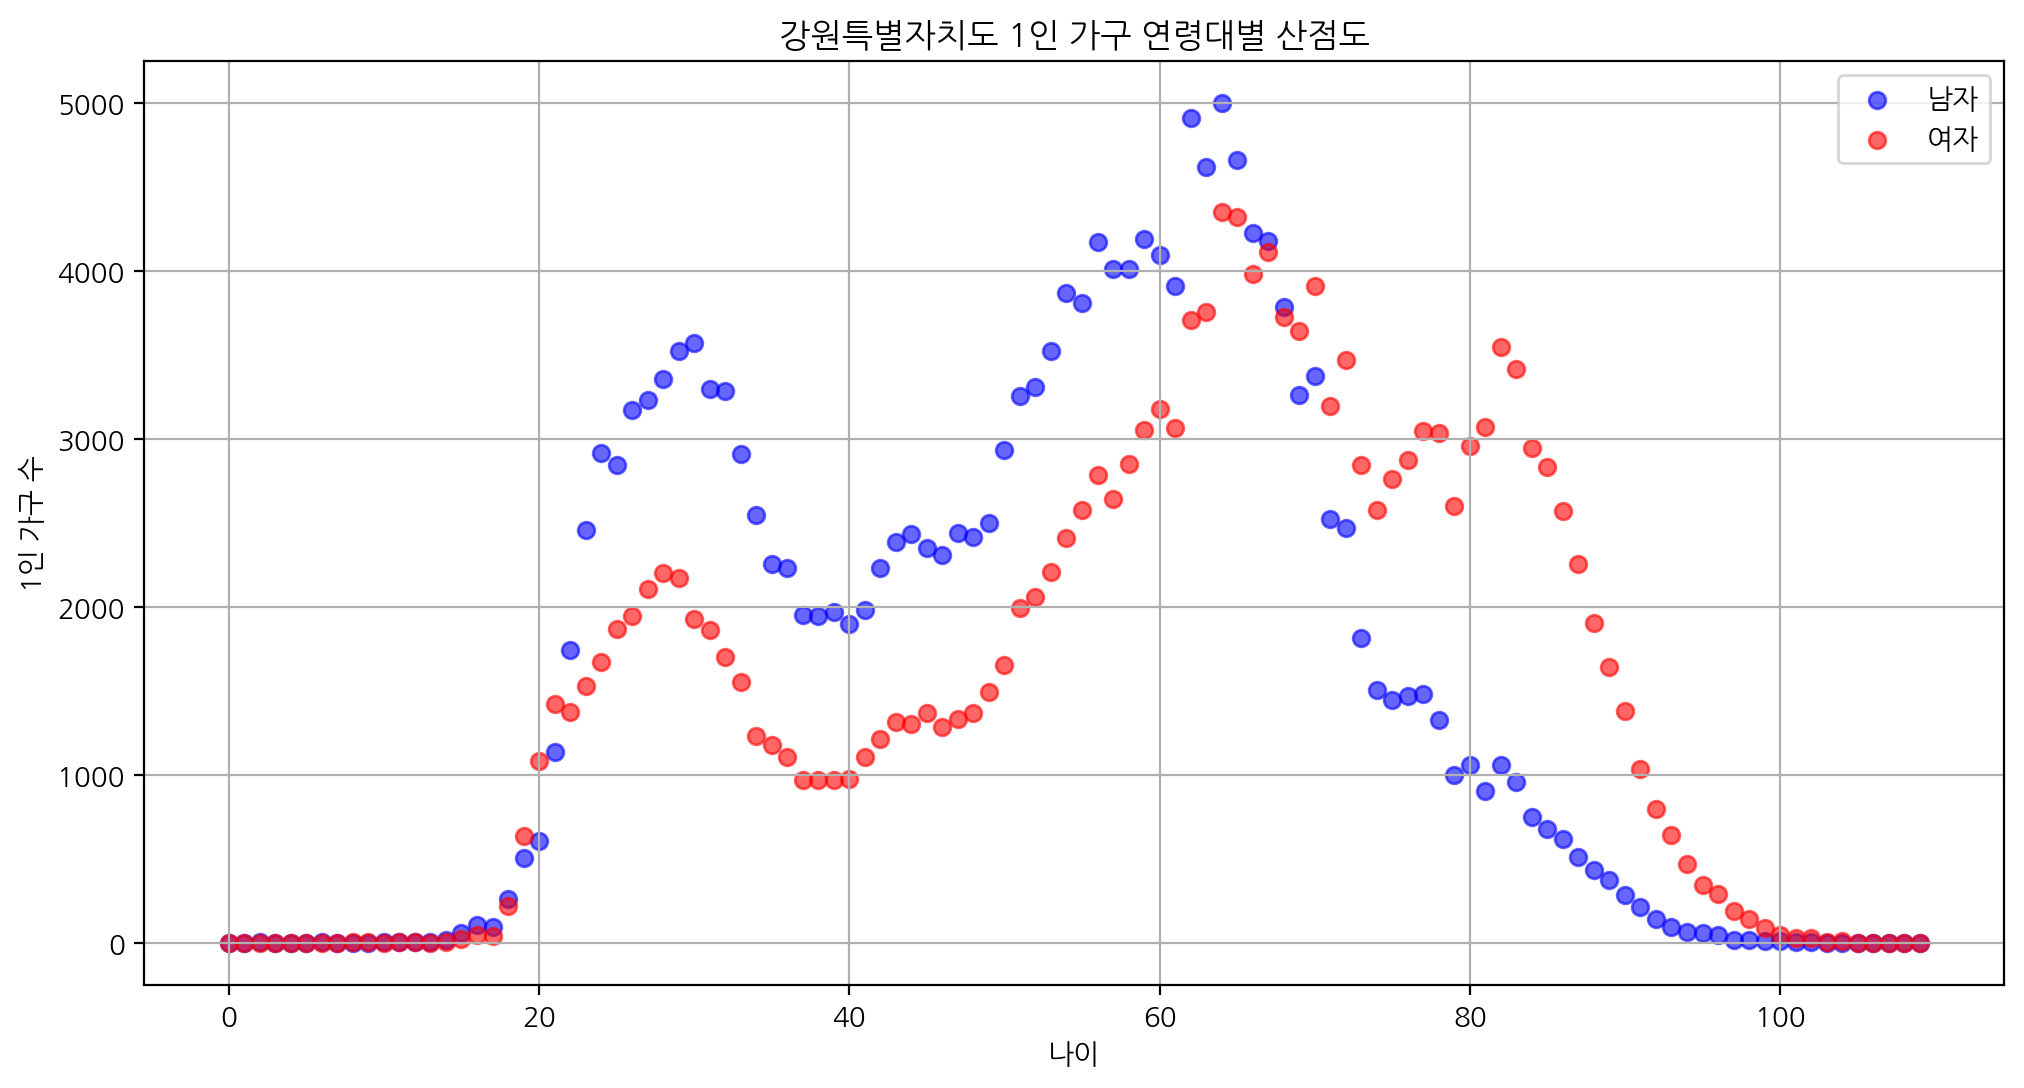

In [143]:
# 강원특별자치도 필터링
gangwon = df[df["시도명"] == "강원특별자치도"]

# 연령 관련 열 분리
male_columns = [col for col in gangwon.columns if "세" in col and "남자" in col]
female_columns = [col for col in gangwon.columns if "세" in col and "여자" in col]

# 남자 데이터
male_ages = []
male_totals = []
for col in male_columns:
    try:
        age = int(col.replace("세남자", ""))
        total = gangwon[col].sum()
        male_ages.append(age)
        male_totals.append(total)
    except:
        continue

# 여자 데이터
female_ages = []
female_totals = []
for col in female_columns:
    try:
        age = int(col.replace("세여자", ""))
        total = gangwon[col].sum()
        female_ages.append(age)
        female_totals.append(total)
    except:
        continue

# 시각화
plt.figure(figsize=(12, 6))
plt.scatter(male_ages, male_totals, color='blue', alpha=0.6, label='남자')
plt.scatter(female_ages, female_totals, color='red', alpha=0.6, label='여자')
plt.title("강원특별자치도 1인 가구 연령대별 산점도")
plt.xlabel("나이")
plt.ylabel("1인 가구 수")
plt.legend()
plt.grid(True)
plt.show()

x축은 연령대, y축은 가구 수다

남자, 여자 공통적으로 60대 초반 1인 가구 수가 제일 많다

충청북도의 1인 가구 성별 비율

In [144]:
print(gender_by_region.loc["충청북도", ["남자비율", "여자비율"]].round(3))

남자비율    0.538
여자비율    0.462
Name: 충청북도, dtype: float64


남자가 여자보다 0.076% 비율이 높다

충청북도의 총 1인 가구 수 (총 수, 남자 수, 여자 수)

In [145]:
print(gender_by_region.loc["충청북도", ["계", "남자", "여자"]])

계     359842.0
남자    193764.0
여자    166078.0
Name: 충청북도, dtype: float64


충청북도에서 1인 가구 수가 가장 많은 지역 top 3

In [146]:
# 충청북도 데이터만 필터링
chungbuk = df[df["시도명"] == "충청북도"]

# 계 기준으로 내림차순 정렬하고 가장 많은 행 3개 출력
top_chungbuk = chungbuk.sort_values(by="계", ascending=False)[["시군구명", "읍면동명", "계"]].head(3)

print("✅ 충청북도에서 1인 가구 수가 가장 많은 지역:")
print(top_chungbuk)

✅ 충청북도에서 1인 가구 수가 가장 많은 지역:
         시군구명  읍면동명      계
1840  청주시 청원구   오창읍  12873
1828  청주시 흥덕구   오송읍  10543
1815  청주시 상당구  용암1동   9611


1위는 청주 청원구 오창읍 총 12873명

2위는 청주 흥덕구 오송읍 총 10543명

3위는 청주 상당구 용암1동 총 9611명

충청북도 1인 가구 연령대별 산점도

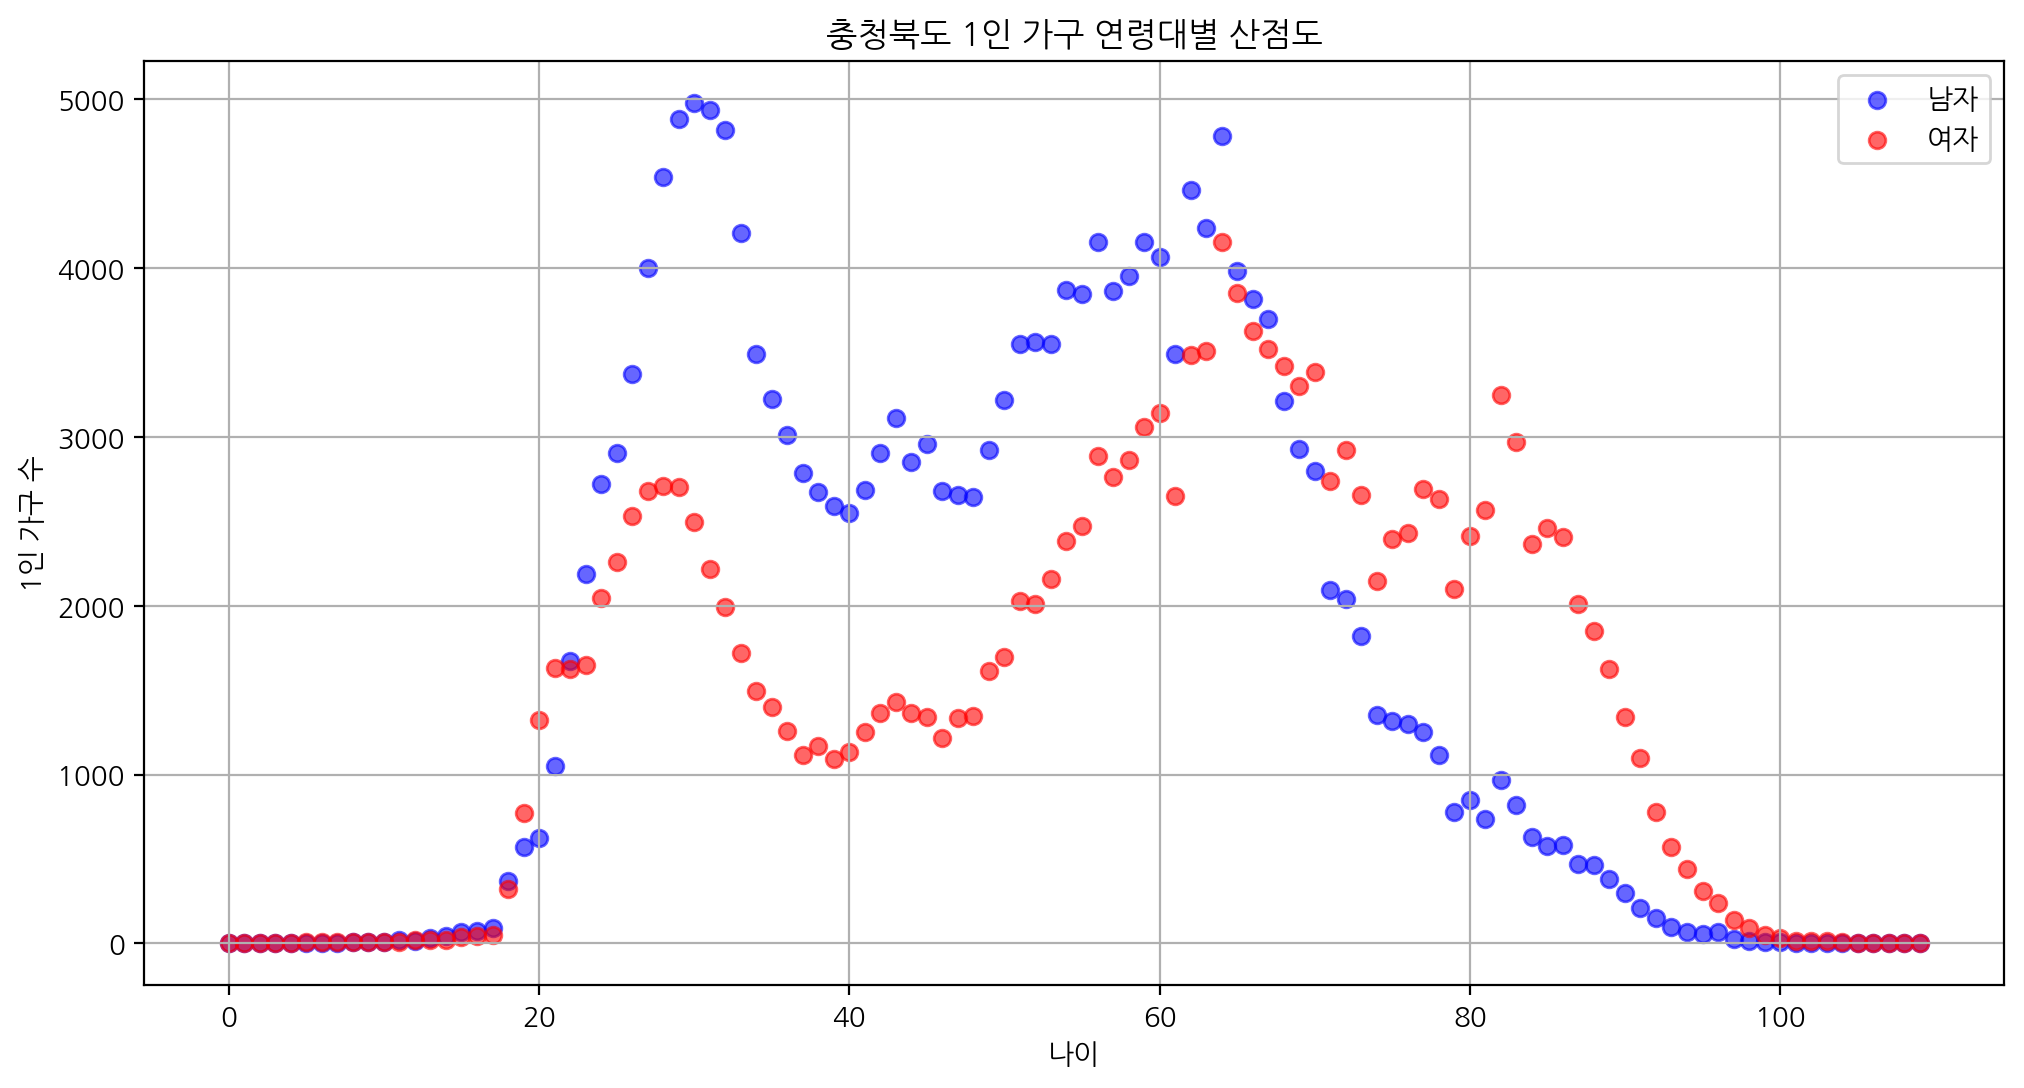

In [147]:
# 충청북도 필터링
chungbuk = df[df["시도명"] == "충청북도"]

# 연령 관련 열 분리
male_columns = [col for col in chungbuk.columns if "세" in col and "남자" in col]
female_columns = [col for col in chungbuk.columns if "세" in col and "여자" in col]

# 남자 데이터
male_ages = []
male_totals = []
for col in male_columns:
    try:
        age = int(col.replace("세남자", ""))
        total = chungbuk[col].sum()
        male_ages.append(age)
        male_totals.append(total)
    except:
        continue

# 여자 데이터
female_ages = []
female_totals = []
for col in female_columns:
    try:
        age = int(col.replace("세여자", ""))
        total = chungbuk[col].sum()
        female_ages.append(age)
        female_totals.append(total)
    except:
        continue

# 시각화
plt.figure(figsize=(12, 6))
plt.scatter(male_ages, male_totals, color='blue', alpha=0.6, label='남자')
plt.scatter(female_ages, female_totals, color='red', alpha=0.6, label='여자')
plt.title("충청북도 1인 가구 연령대별 산점도")
plt.xlabel("나이")
plt.ylabel("1인 가구 수")
plt.legend()
plt.grid(True)
plt.show()

x축은 연령대, y축은 가구 수다

남자의 경우 30대 1인 가구 수가 제일 높았고 여자의 경우 60대 초반 1인 가구 수가 제일 높다

충청남도의 1인 가구 성별 비율

In [148]:
print(gender_by_region.loc["충청남도", ["남자비율", "여자비율"]].round(3))

남자비율    0.552
여자비율    0.448
Name: 충청남도, dtype: float64


남자가 여자보다 0.104% 더 높다

충청남도의 총 1인 가구 수 (총 수, 남자 수, 여자 수)

In [149]:
print(gender_by_region.loc["충청남도", ["계", "남자", "여자"]])

계     479804.0
남자    264682.0
여자    215122.0
Name: 충청남도, dtype: float64


충청남도에서 1인 가구 수가 가장 많은 지역 top 3

In [150]:
# 충청남도 데이터만 필터링
chungnam = df[df["시도명"] == "충청남도"]

# 계 기준으로 내림차순 정렬하고 가장 많은 행 3개 출력
top_chungnam = chungnam.sort_values(by="계", ascending=False)[["시군구명", "읍면동명", "계"]].head(3)

print("✅ 충청남도에서 1인 가구 수가 가장 많은 지역:")
print(top_chungnam)

✅ 충청남도에서 1인 가구 수가 가장 많은 지역:
         시군구명  읍면동명      계
2023      아산시   배방읍  19022
1986  천안시 서북구  부성1동  14326
1979  천안시 서북구  성정2동  13196


1위는 아산시 배방읍 총 19022명

2위는 천안 서북구 부성1동 총 14326명

3위는 천안 서북구 성정2동 총 13196명

충청남도 1인 가구 연령대별 산점도

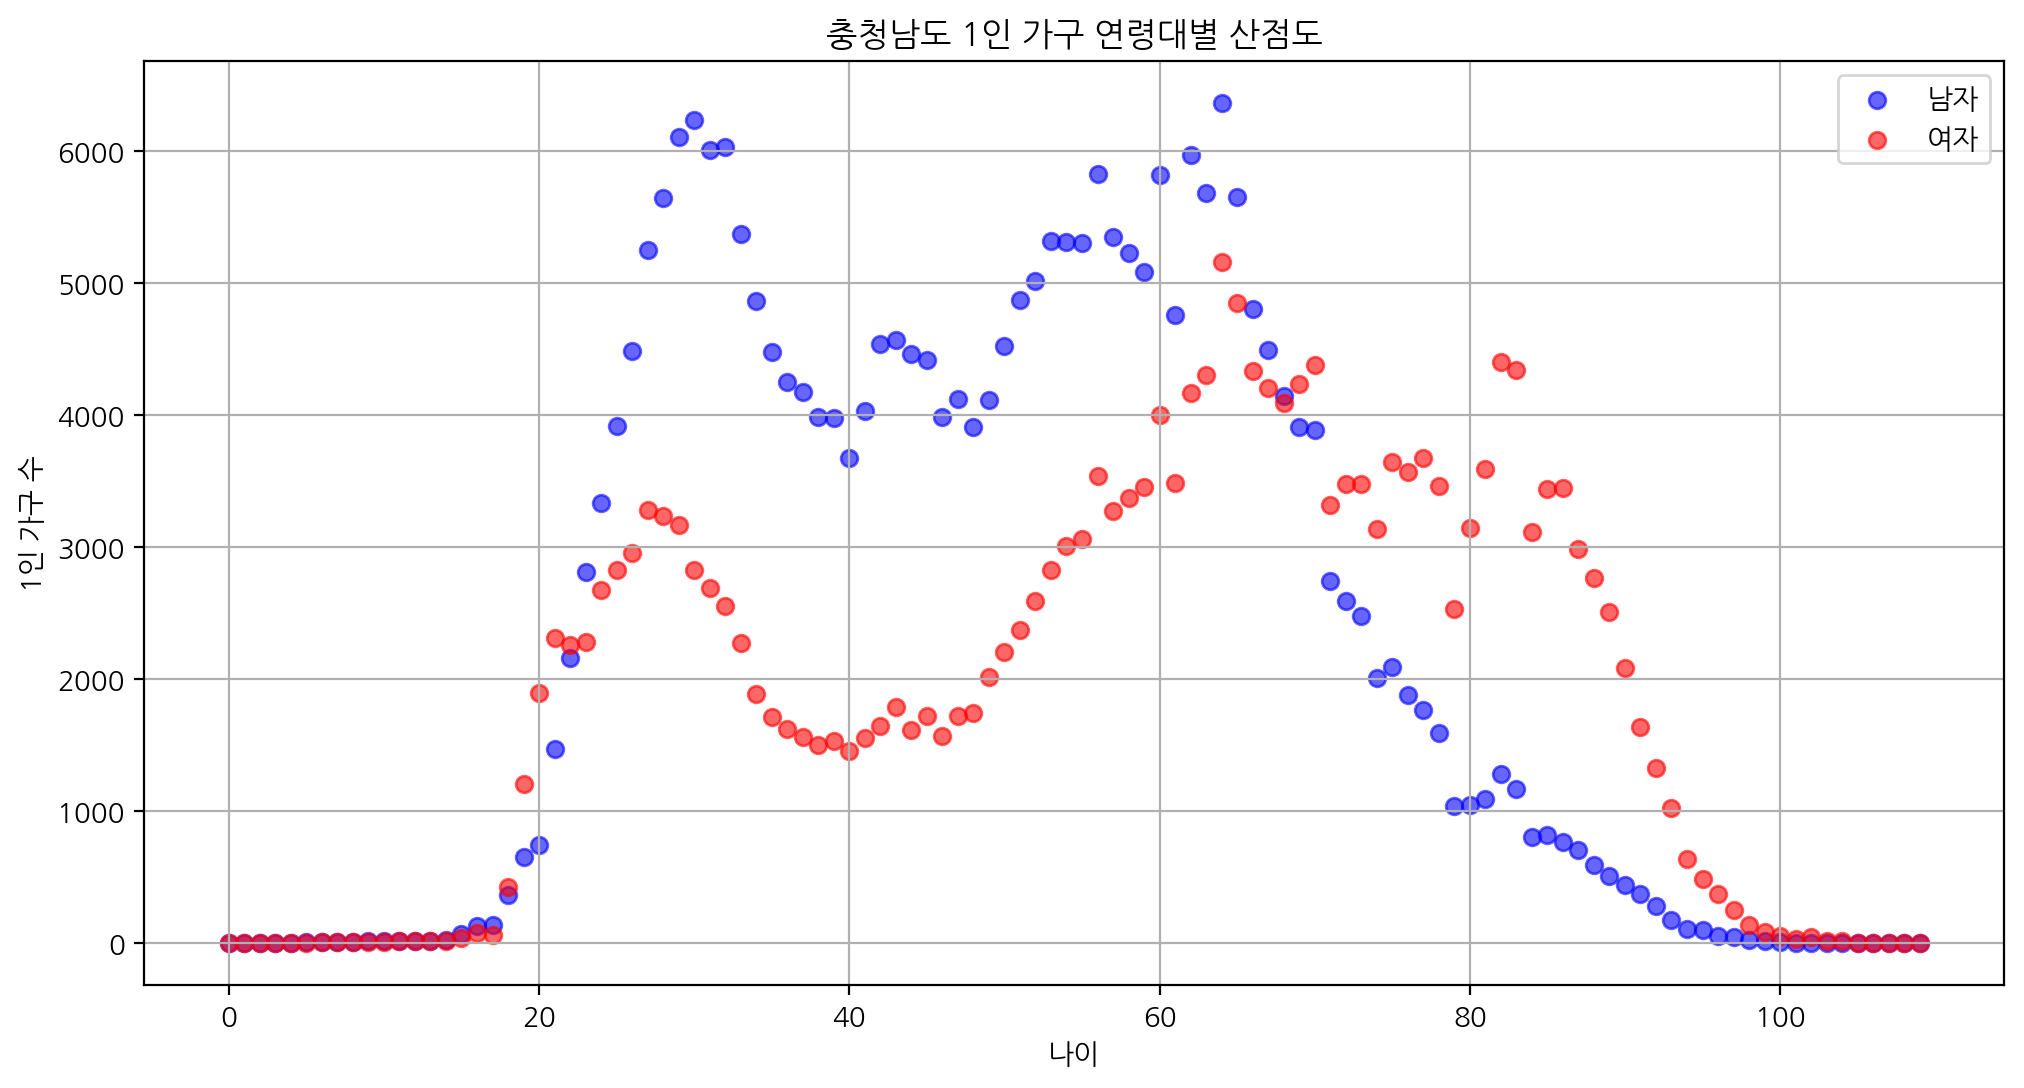

In [151]:
# 충청남도 필터링
chungnam = df[df["시도명"] == "충청남도"]

# 연령 관련 열 분리
male_columns = [col for col in chungnam.columns if "세" in col and "남자" in col]
female_columns = [col for col in chungnam.columns if "세" in col and "여자" in col]

# 남자 데이터
male_ages = []
male_totals = []
for col in male_columns:
    try:
        age = int(col.replace("세남자", ""))
        total = chungnam[col].sum()
        male_ages.append(age)
        male_totals.append(total)
    except:
        continue

# 여자 데이터
female_ages = []
female_totals = []
for col in female_columns:
    try:
        age = int(col.replace("세여자", ""))
        total = chungnam[col].sum()
        female_ages.append(age)
        female_totals.append(total)
    except:
        continue

# 시각화
plt.figure(figsize=(12, 6))
plt.scatter(male_ages, male_totals, color='blue', alpha=0.6, label='남자')
plt.scatter(female_ages, female_totals, color='red', alpha=0.6, label='여자')
plt.title("충청남도 1인 가구 연령대별 산점도")
plt.xlabel("나이")
plt.ylabel("1인 가구 수")
plt.legend()
plt.grid(True)
plt.show()

x축은 연령대, y축은 가구 수다

남자와 여자 동일하게 60대 초반 1인 가구 수가 제일 많다

울산광역시의 1인 가구 성별 비율

In [152]:
print(gender_by_region.loc["울산광역시", ["남자비율", "여자비율"]].round(3))

남자비율    0.568
여자비율    0.432
Name: 울산광역시, dtype: float64


남자가 여자보다 0.136% 더 높다

울산광역시의 총 1인 가구 수 (총 수, 남자 수, 여자 수)

In [153]:
print(gender_by_region.loc["울산광역시", ["계", "남자", "여자"]])

계     186506.0
남자    105999.0
여자     80507.0
Name: 울산광역시, dtype: float64


울산광역시에서 1인 가구 수가 가장 많은 지역 top 3

In [154]:
# 울산광역시 데이터만 필터링
ulsan = df[df["시도명"] == "울산광역시"]

# 계 기준으로 내림차순 정렬하고 가장 많은 행 3개 출력
top_ulsan = ulsan.sort_values(by="계", ascending=False)[["시군구명", "읍면동명", "계"]].head(3)

print("✅ 울산광역시에서 1인 가구 수가 가장 많은 지역:")
print(top_ulsan)

✅ 울산광역시에서 1인 가구 수가 가장 많은 지역:
     시군구명 읍면동명      계
1140   남구  삼산동  12094
1148   동구  방어동   7687
1139   남구   달동   7134


1위는 남구 삼산동 총 12094명

2위는 동구 방어동 총 7687명

3위는 남구 달동 총 7134명

울산광역시 1인 가구 연령대별 산점도

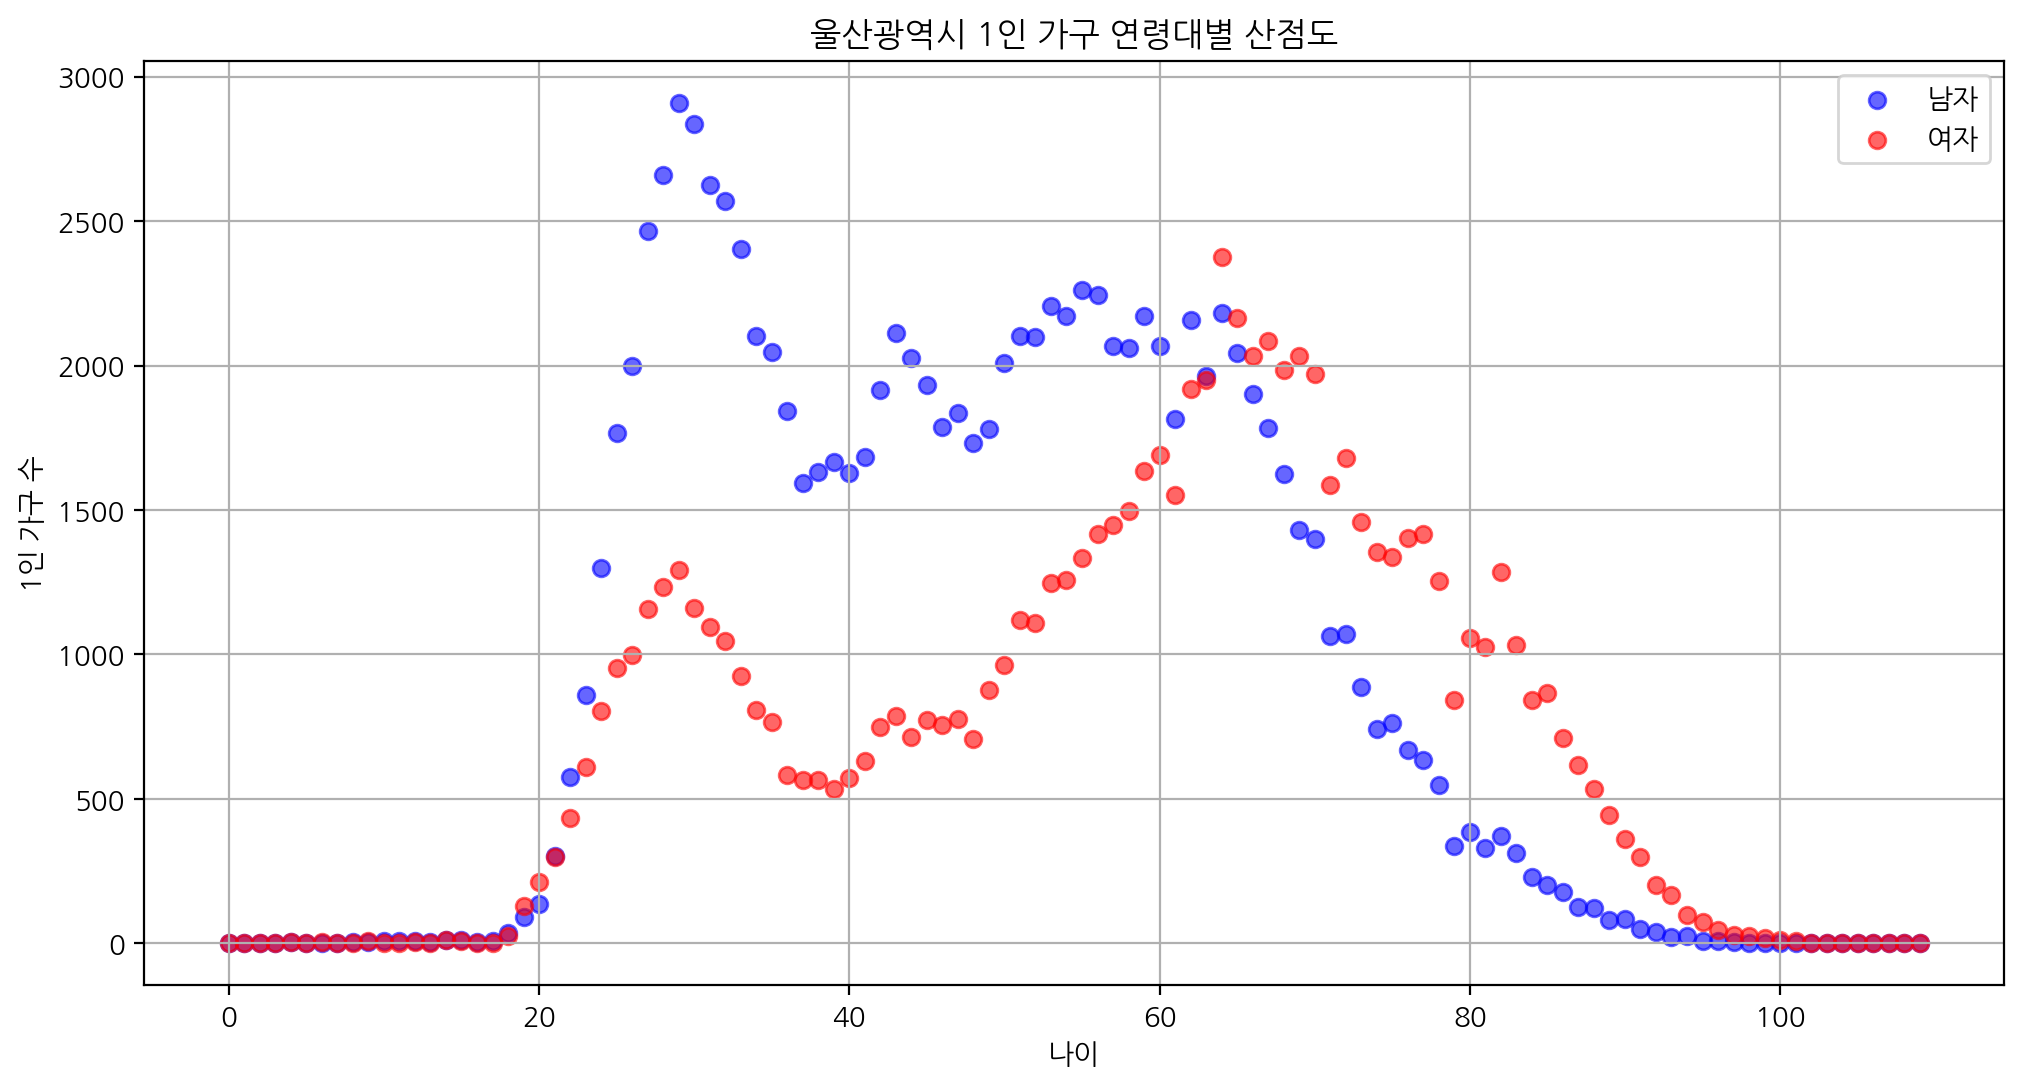

In [155]:
# 울산광역시 필터링
ulsan = df[df["시도명"] == "울산광역시"]

# 연령 관련 열 분리
male_columns = [col for col in ulsan.columns if "세" in col and "남자" in col]
female_columns = [col for col in ulsan.columns if "세" in col and "여자" in col]

# 남자 데이터
male_ages = []
male_totals = []
for col in male_columns:
    try:
        age = int(col.replace("세남자", ""))
        total = ulsan[col].sum()
        male_ages.append(age)
        male_totals.append(total)
    except:
        continue

# 여자 데이터
female_ages = []
female_totals = []
for col in female_columns:
    try:
        age = int(col.replace("세여자", ""))
        total = ulsan[col].sum()
        female_ages.append(age)
        female_totals.append(total)
    except:
        continue

# 시각화
plt.figure(figsize=(12, 6))
plt.scatter(male_ages, male_totals, color='blue', alpha=0.6, label='남자')
plt.scatter(female_ages, female_totals, color='red', alpha=0.6, label='여자')
plt.title("울산광역시 1인 가구 연령대별 산점도")
plt.xlabel("나이")
plt.ylabel("1인 가구 수")
plt.legend()
plt.grid(True)
plt.show()

x축은 연령대, y축은 가구 수다

남자의 경우 30대 초반 1인 가구 수가 제일 높았고 여자의 경우 60대 초반 1인 가구 수가 제일 높다

광주광역시의 1인 가구 성별 비율

In [156]:
print(gender_by_region.loc["광주광역시", ["남자비율", "여자비율"]].round(3))

남자비율    0.502
여자비율    0.498
Name: 광주광역시, dtype: float64


남자가 여자보다 0.004% 많다

광주광역시의 총 1인 가구 수 (총 수, 남자 수, 여자 수)

In [157]:
print(gender_by_region.loc["광주광역시", ["계", "남자", "여자"]])

계     276695.0
남자    138830.0
여자    137865.0
Name: 광주광역시, dtype: float64


광주광역시에서 1인 가구 수가 가장 많은 지역 top 3

In [158]:
# 광주광역시 데이터만 필터링
gwangju = df[df["시도명"] == "광주광역시"]

# 계 기준으로 내림차순 정렬하고 가장 많은 행 3개 출력
top_gwangju = gwangju.sort_values(by="계", ascending=False)[["시군구명", "읍면동명", "계"]].head(3)

print("✅ 광주광역시에서 1인 가구 수가 가장 많은 지역:")
print(top_gwangju)

✅ 광주광역시에서 1인 가구 수가 가장 많은 지역:
     시군구명  읍면동명     계
997    북구   용봉동  8531
1032  광산구   수완동  8162
1029  광산구  첨단2동  8149


1위는 북구 용봉동 총 8531명

2위는 광산구 수완동 총 8162명

3위는 광산구 첨단2동 총 8149명

광주광역시 1인 가구 연령대별 산점도

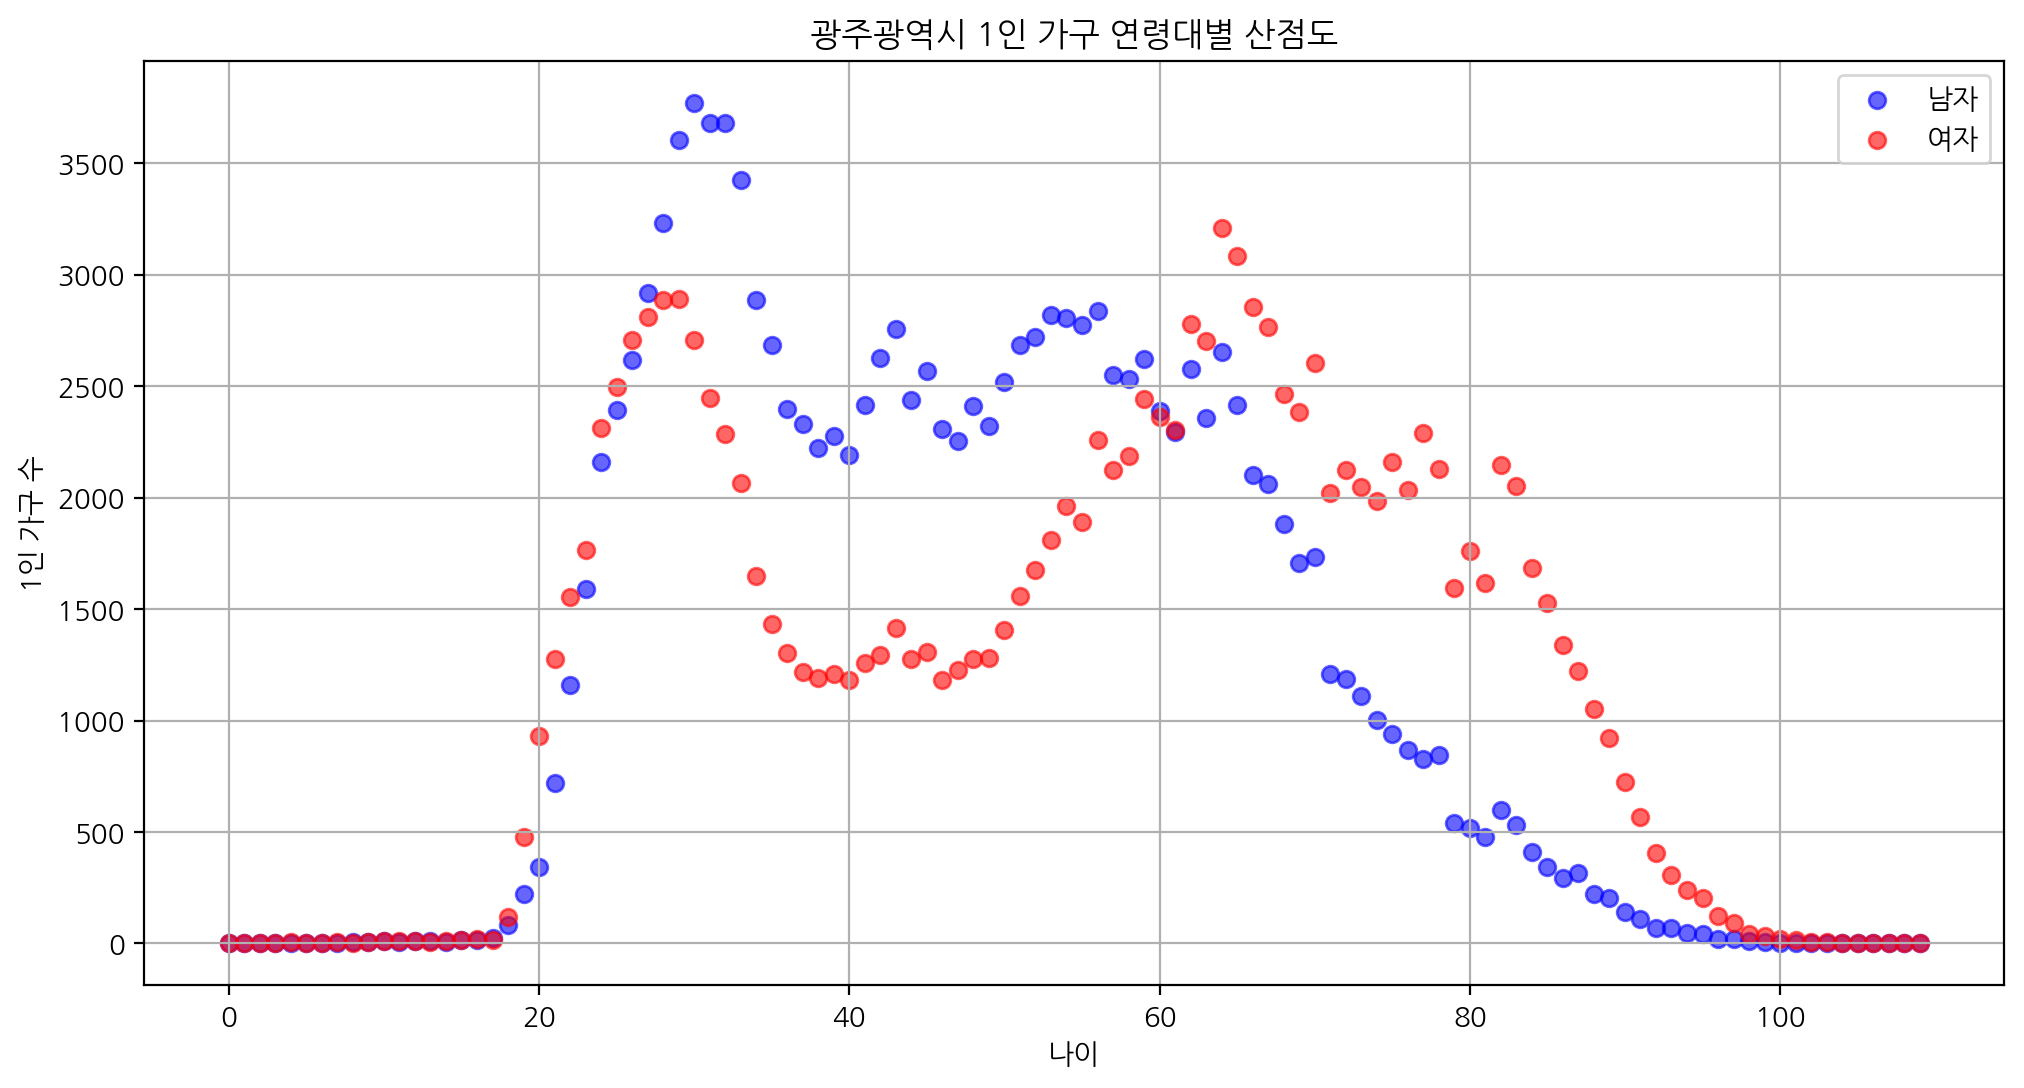

In [159]:
# 광주광역시 필터링
gwangju = df[df["시도명"] == "광주광역시"]

# 연령 관련 열 분리
male_columns = [col for col in gwangju.columns if "세" in col and "남자" in col]
female_columns = [col for col in gwangju.columns if "세" in col and "여자" in col]

# 남자 데이터
male_ages = []
male_totals = []
for col in male_columns:
    try:
        age = int(col.replace("세남자", ""))
        total = gwangju[col].sum()
        male_ages.append(age)
        male_totals.append(total)
    except:
        continue

# 여자 데이터
female_ages = []
female_totals = []
for col in female_columns:
    try:
        age = int(col.replace("세여자", ""))
        total = gwangju[col].sum()
        female_ages.append(age)
        female_totals.append(total)
    except:
        continue

# 시각화
plt.figure(figsize=(12, 6))
plt.scatter(male_ages, male_totals, color='blue', alpha=0.6, label='남자')
plt.scatter(female_ages, female_totals, color='red', alpha=0.6, label='여자')
plt.title("광주광역시 1인 가구 연령대별 산점도")
plt.xlabel("나이")
plt.ylabel("1인 가구 수")
plt.legend()
plt.grid(True)
plt.show()

x축은 연령대, y축은 가구 수다

남자의 경우 30대 1인 가구 수가 제일 높았고 여자의 경우 60대 초반 1인 가구 수가 제일 높다